In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.87869391923


In [1]:
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/vary triplet/triplet.pkl')

new_X = new_df[:]
print(new_X.shape)

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred

triplet3 = new_X.loc[new_X['triplet_HOST'] == 3]
triplet3['cd/a'].shape

NameError: name 'pd' is not defined

In [5]:
column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]

In [6]:
HTL = {'total': triplet3['cd/a'], '50': device50['cd/a'], '45': device45['cd/a'] , '40': device40['cd/a'] , '35': device35['cd/a'] , 
       '30': device30['cd/a'] , '25': device25['cd/a'], '20': device20['cd/a'], '10': device10['cd/a']
      , '0': device['cd/a']}
sequence = ['total', '50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# # boxplot
# f, ax = plt.subplots(figsize=(12, 10))
# fig = sns.boxplot(data=df)
# plt.xticks(rotation=90,fontsize=12)
# plt.yticks(fontsize=12)
# plt.title('HTL LUMO ',fontsize=20);
df.describe()

,total,50,45,40,35,30,25,20,10,0
count,38760.000000,201.000000,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,31.859538,50.862040,46.462899,43.160921,37.038029,32.253610,28.879903,NaN,11.569924,8.162787
std,11.475877,0.892829,1.456431,1.202918,1.668296,1.313525,0.806251,NaN,1.854995,0.921468
min,5.790000,50.000000,45.000000,40.000000,35.000000,30.000000,26.280000,NaN,10.000000,5.790000
25%,29.440000,50.190000,45.320000,42.370000,35.450000,31.150000,28.340000,NaN,10.290000,7.470000
50%,32.510000,50.520000,46.010000,43.270000,36.475000,32.230000,29.030000,NaN,10.660000,8.120000
75%,42.140000,51.160000,46.850000,44.180000,38.620000,33.270000,29.540000,NaN,12.497500,8.790000
max,53.720000,53.720000,49.990000,44.990000,39.990000,34.990000,29.990000,NaN,17.000000,9.990000


,50,45,40,35,30,25,20,10,0
count,201.000000,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,2.358408,2.341864,2.233215,2.298818,2.315544,2.071214,NaN,2.312459,2.238406
std,0.110061,0.132909,0.207598,0.180982,0.150433,0.216707,NaN,0.165929,0.206041
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,NaN,1.900000,1.900000
25%,2.400000,2.400000,2.000000,2.200000,2.200000,1.900000,NaN,2.200000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.200000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,2.500000,2.500000


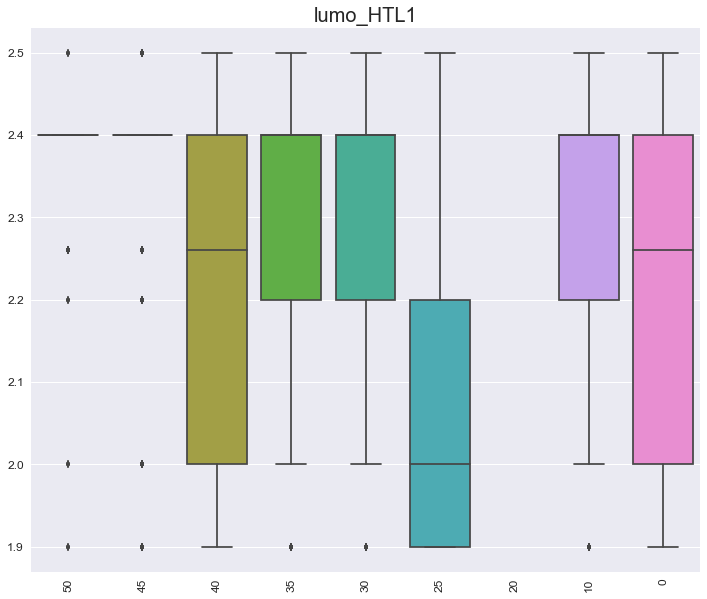

In [9]:
def layer(name): 
    column = name
    HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
           '30': device30[column] , '25': device25[column], '20': device20[column], '10': device10[column], 
           '0': device[column]}
    sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
    df = pd.DataFrame(data=HTL).reindex(columns=sequence)

    # boxplot
    f, ax = plt.subplots(figsize=(12, 10))
    fig = sns.boxplot(data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(name, fontsize=20);
    return df.describe()

layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,201.000000,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,5.868159,5.842583,5.560781,5.753773,5.705765,5.332177,NaN,5.692522,5.601541
std,0.247146,0.276784,0.298916,0.342447,0.276251,0.243255,NaN,0.300361,0.322232
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.700000,5.700000,5.200000,5.500000,5.700000,5.100000,NaN,5.500000,5.200000
50%,5.900000,5.900000,5.700000,5.800000,5.700000,5.200000,NaN,5.700000,5.700000
75%,6.100000,6.100000,5.800000,6.100000,5.900000,5.500000,NaN,5.900000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,NaN,6.100000,6.100000


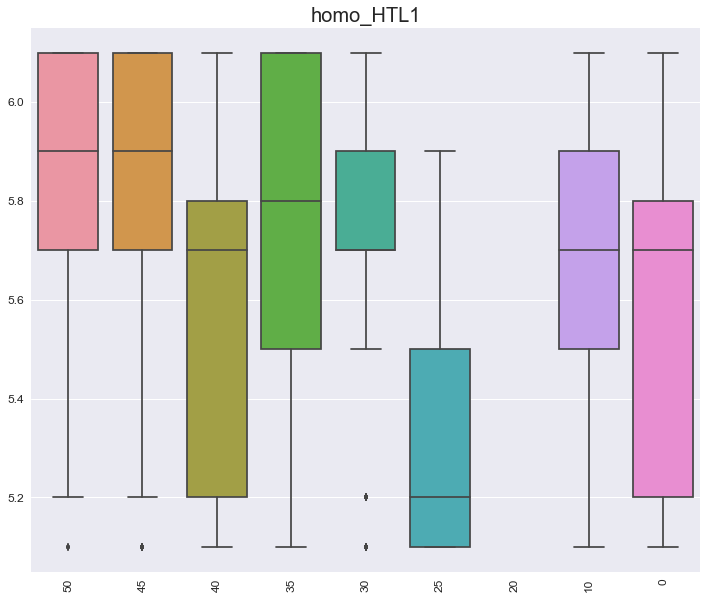

In [10]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,201.000000,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,2.858706,2.816190,2.749862,2.776712,2.780752,2.694307,NaN,2.769512,2.760064
std,0.132330,0.171815,0.230439,0.189785,0.228028,0.198603,NaN,0.235938,0.214557
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.670000,2.580000,2.670000,NaN,2.580000,2.670000
50%,2.870000,2.800000,2.870000,2.800000,2.870000,2.670000,NaN,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,NaN,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


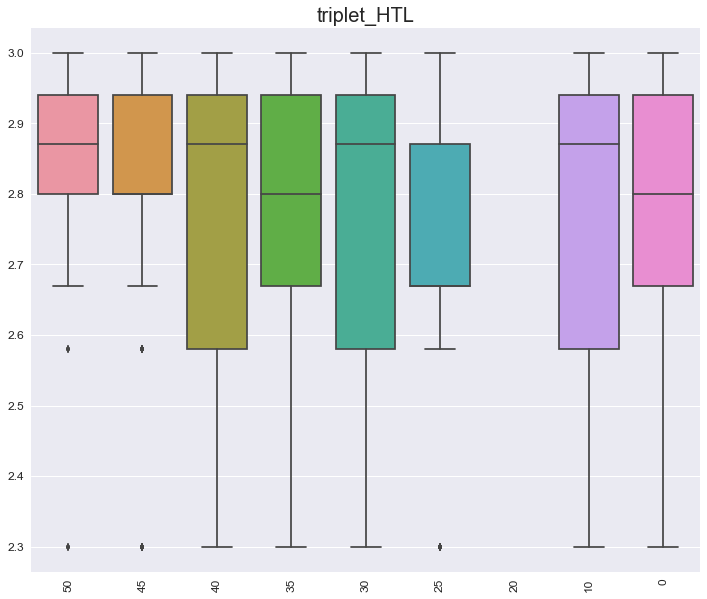

In [11]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.010000e+02,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,3.470000e+00,2.780206,2.822962,3.001267,2.719291,2.842423,NaN,3.127630,3.090401
std,1.691753e-14,0.378852,0.306172,0.449105,0.260038,0.252211,NaN,0.299244,0.292142
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.500000,2.600000,2.520000,2.520000,2.700000,NaN,2.800000,2.800000
50%,3.470000e+00,2.700000,2.730000,2.750000,2.700000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,2.880000,2.910000,3.470000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


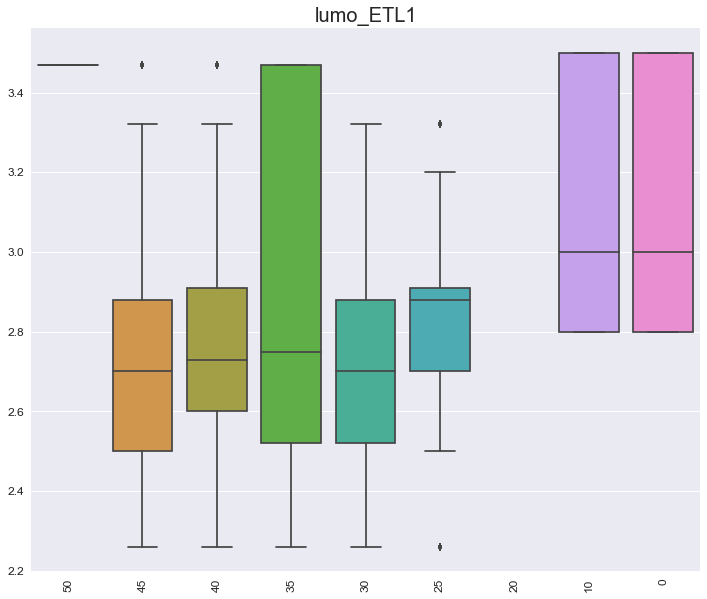

In [12]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,201.0,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,7.5,6.621942,6.520365,6.973806,6.462425,6.392693,NaN,6.565146,6.522281
std,0.0,0.508305,0.419968,0.530272,0.342178,0.338933,NaN,0.346193,0.337107
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.130000,6.120000,6.500000,6.130000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.560000,6.560000,6.800000,6.500000,6.500000,NaN,6.400000,6.400000
75%,7.5,6.800000,6.790000,7.500000,6.790000,6.670000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,NaN,7.000000,7.000000


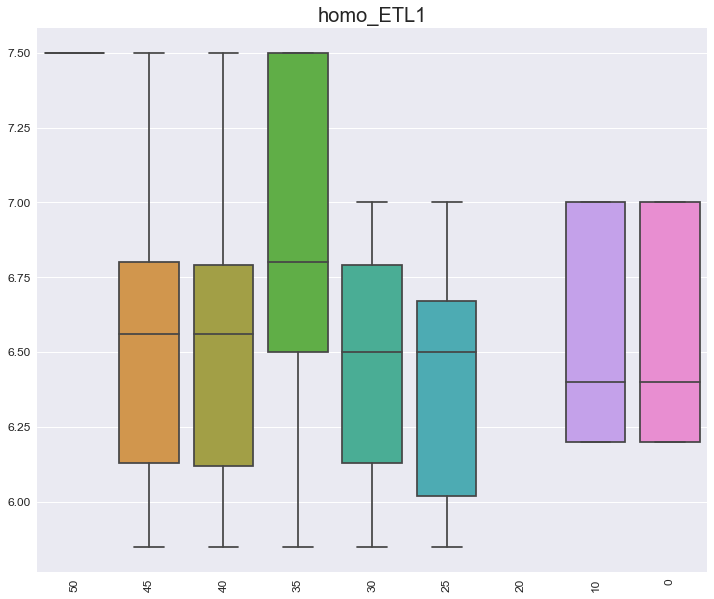

In [13]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.010000e+02,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,2.990000e+00,2.879214,2.840554,2.951064,2.846718,2.790357,NaN,2.567490,2.566380
std,6.677971e-15,0.234339,0.209694,0.221002,0.235467,0.149871,NaN,0.046856,0.047246
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.750000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.990000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.800000,NaN,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


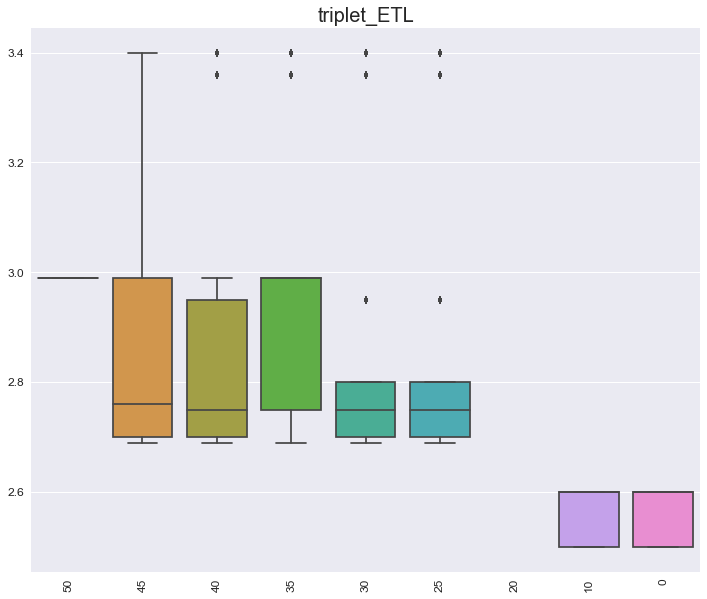

In [14]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,201.000000,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,2.394726,2.413952,2.421645,2.419611,2.421496,2.410084,NaN,2.528568,2.380696
std,0.208512,0.219009,0.262145,0.224874,0.259074,0.233499,NaN,0.274243,0.230157
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.020000,2.020000
25%,2.300000,2.300000,2.270000,2.300000,2.280000,2.280000,NaN,2.400000,2.270000
50%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,NaN,2.400000,2.300000
75%,2.460000,2.460000,2.550000,2.460000,2.460000,2.550000,NaN,2.670000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


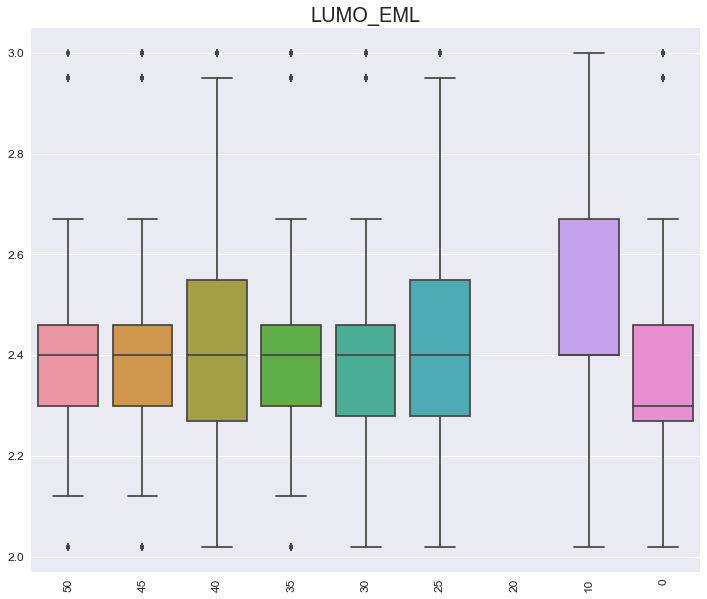

In [15]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,201.000000,2811.000000,8427.000000,1776.000000,14294.000000,5131.000000,0.0,1578.000000,4542.000000
mean,6.139055,6.119562,5.839696,6.171655,5.899594,5.825137,NaN,6.251141,5.788309
std,0.690126,0.655324,0.274501,0.721644,0.410449,0.123212,NaN,0.690940,0.116628
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.560000,5.560000
25%,5.710000,5.800000,5.700000,5.710000,5.710000,5.800000,NaN,5.860000,5.700000
50%,5.860000,5.860000,5.800000,5.850000,5.850000,5.860000,NaN,5.900000,5.800000
75%,5.920000,5.920000,5.900000,5.955000,5.900000,5.900000,NaN,6.060000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,6.060000


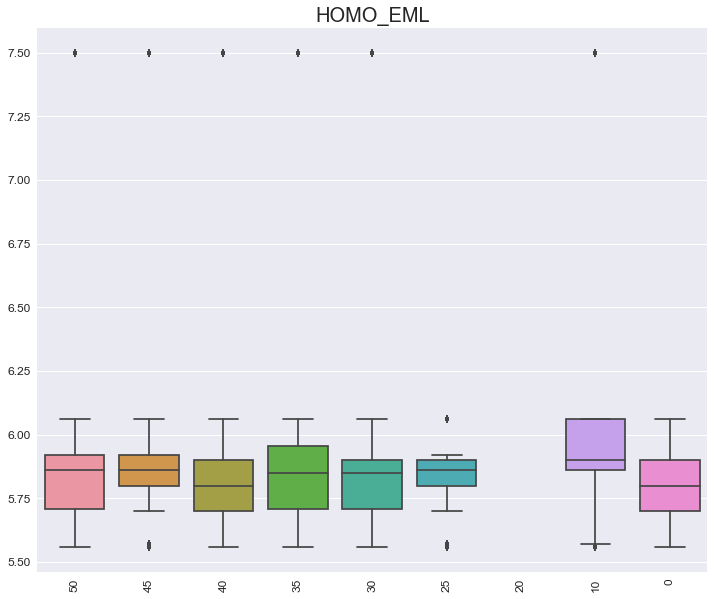

In [16]:
layer('HOMO_EML')

In [18]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.95]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
# device.shape

(4965, 32)

,50,45,40,35,30,25,20,10,0
count,256.000000,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,2.328203,2.323523,2.224662,2.330904,2.266568,2.024776,NaN,2.322961,2.242272
std,0.128667,0.134146,0.216315,0.137691,0.190906,0.215493,NaN,0.166591,0.202966
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,NaN,1.900000,1.900000
25%,2.260000,2.260000,2.000000,2.260000,2.200000,1.900000,NaN,2.260000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.260000,1.900000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.000000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,2.500000,2.500000


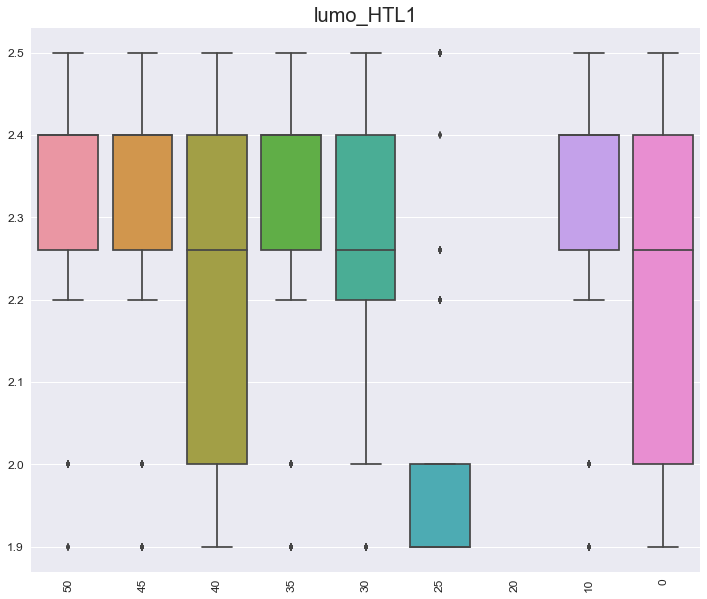

In [19]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,256.000000,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,5.832031,5.811501,5.531306,5.829601,5.619496,5.218776,NaN,5.699913,5.607573
std,0.236787,0.256182,0.302122,0.276417,0.295456,0.176242,NaN,0.317226,0.317168
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.700000,5.700000,5.200000,5.700000,5.500000,5.100000,NaN,5.500000,5.200000
50%,5.800000,5.800000,5.700000,5.900000,5.700000,5.100000,NaN,5.700000,5.700000
75%,6.100000,6.100000,5.800000,6.100000,5.800000,5.200000,NaN,5.900000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.800000,NaN,6.100000,6.100000


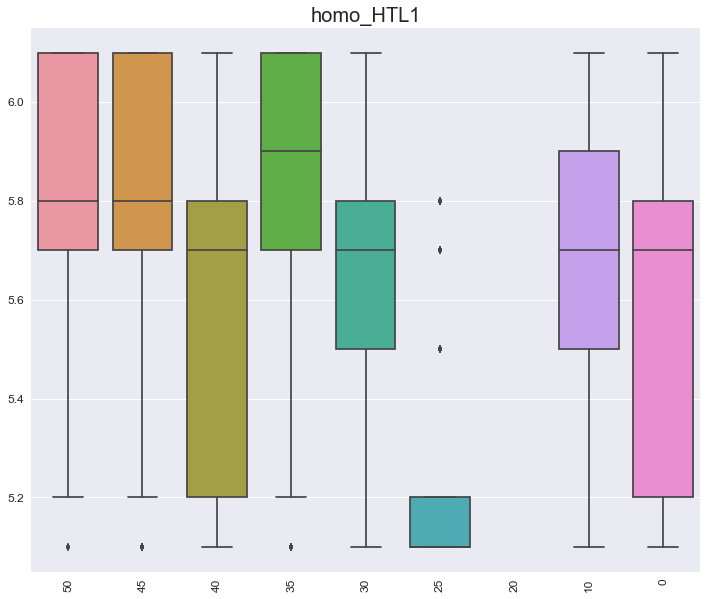

In [20]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,256.000000,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,2.860469,2.820474,2.735794,2.816976,2.758399,2.658306,NaN,2.770701,2.760592
std,0.134184,0.174631,0.235105,0.169201,0.232393,0.178242,NaN,0.239863,0.215460
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.800000,2.580000,2.670000,NaN,2.580000,2.670000
50%,2.940000,2.870000,2.870000,2.800000,2.870000,2.670000,NaN,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.670000,NaN,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.940000,NaN,3.000000,3.000000


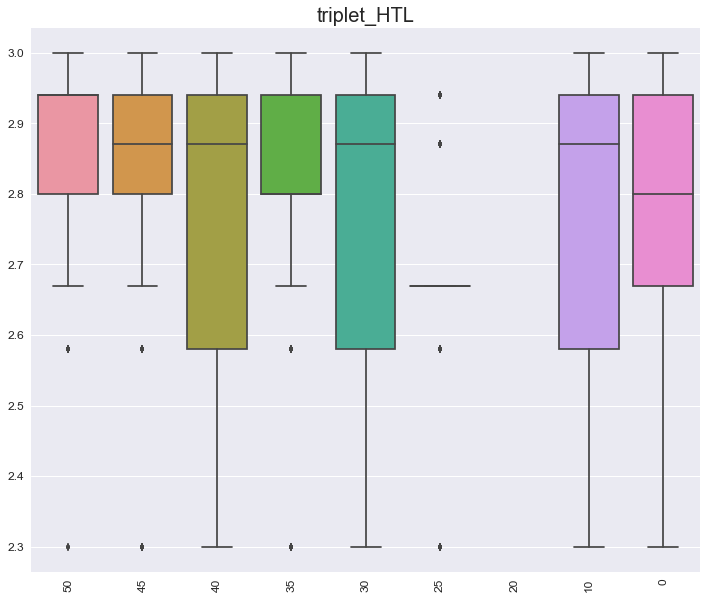

In [21]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.560000e+02,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,3.470000e+00,2.717916,2.887062,2.744645,2.753146,2.874010,NaN,3.152381,3.087815
std,1.913324e-14,0.332349,0.322762,0.347972,0.268511,0.221596,NaN,0.303048,0.291054
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.500000,2.520000,2.730000,NaN,2.800000,2.800000
50%,3.470000e+00,2.700000,2.880000,2.600000,2.730000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,2.750000,3.200000,2.750000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


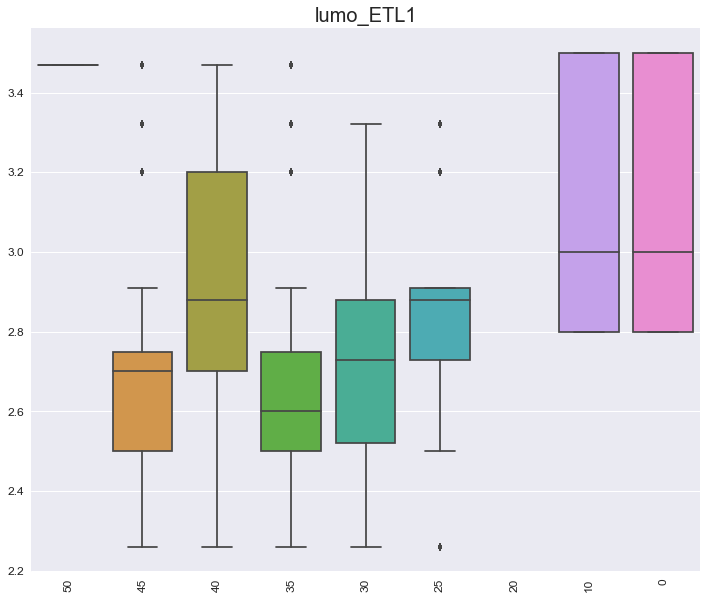

In [22]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,256.0,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,7.5,6.568292,6.563758,6.670493,6.445639,6.337582,NaN,6.593939,6.519235
std,0.0,0.451954,0.466978,0.448365,0.344945,0.316690,NaN,0.350980,0.335819
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.130000,6.120000,6.500000,6.120000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.560000,6.560000,6.790000,6.500000,6.300000,NaN,6.400000,6.400000
75%,7.5,6.800000,6.800000,6.800000,6.790000,6.560000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,NaN,7.000000,7.000000


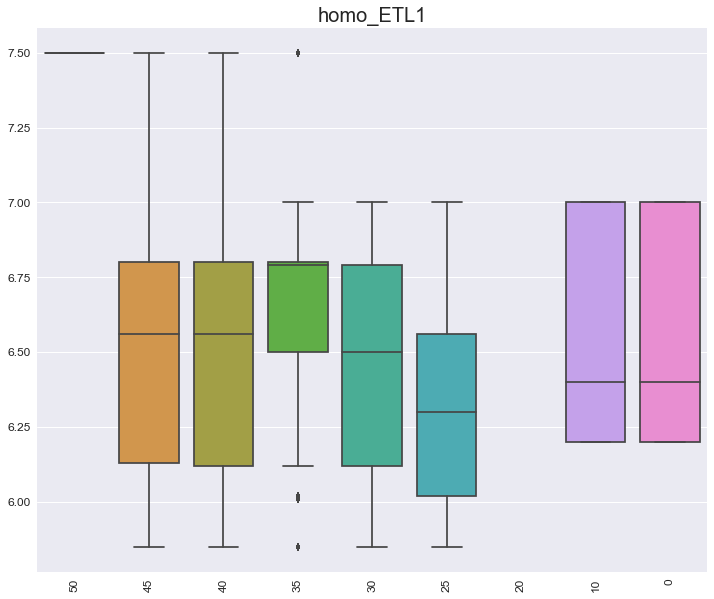

In [23]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.560000e+02,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,2.990000e+00,2.880664,2.837445,2.922367,2.829742,2.766071,NaN,2.569264,2.566062
std,7.119346e-15,0.250871,0.190677,0.271188,0.213964,0.097569,NaN,0.046160,0.047355
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.700000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.760000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.760000,NaN,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


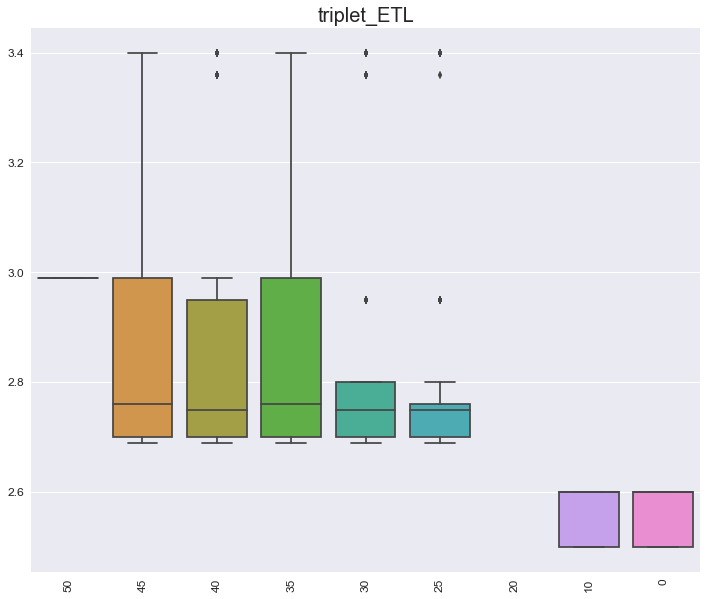

In [24]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,256.000000,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,2.394531,2.401326,2.428970,2.419631,2.416311,2.439393,NaN,2.488771,2.402552
std,0.205598,0.228501,0.263675,0.242004,0.255941,0.221767,NaN,0.250348,0.248066
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.020000,2.020000
25%,2.300000,2.280000,2.270000,2.300000,2.270000,2.300000,NaN,2.400000,2.270000
50%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,NaN,2.400000,2.300000
75%,2.460000,2.460000,2.550000,2.460000,2.460000,2.550000,NaN,2.550000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


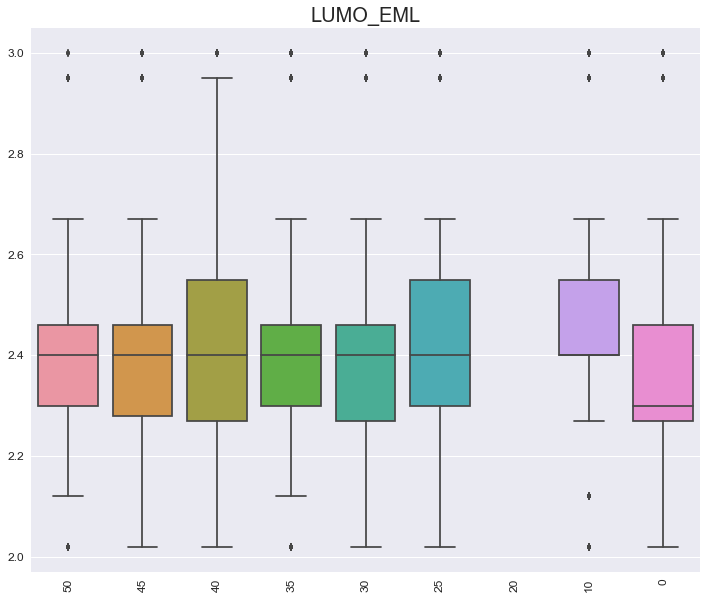

In [25]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,256.000000,4156.000000,7318.000000,3608.000000,15342.000000,1960.000000,0.0,1155.000000,4965.000000
mean,6.061719,6.032221,5.836222,6.115166,5.862771,5.859321,NaN,6.371152,5.799823
std,0.631668,0.596536,0.243262,0.708812,0.316536,0.104159,NaN,0.769080,0.124596
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.560000,5.560000
25%,5.710000,5.710000,5.710000,5.700000,5.710000,5.800000,NaN,5.860000,5.700000
50%,5.855000,5.850000,5.850000,5.800000,5.850000,5.900000,NaN,5.900000,5.800000
75%,5.900000,5.900000,5.900000,5.900000,5.900000,5.900000,NaN,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,6.060000


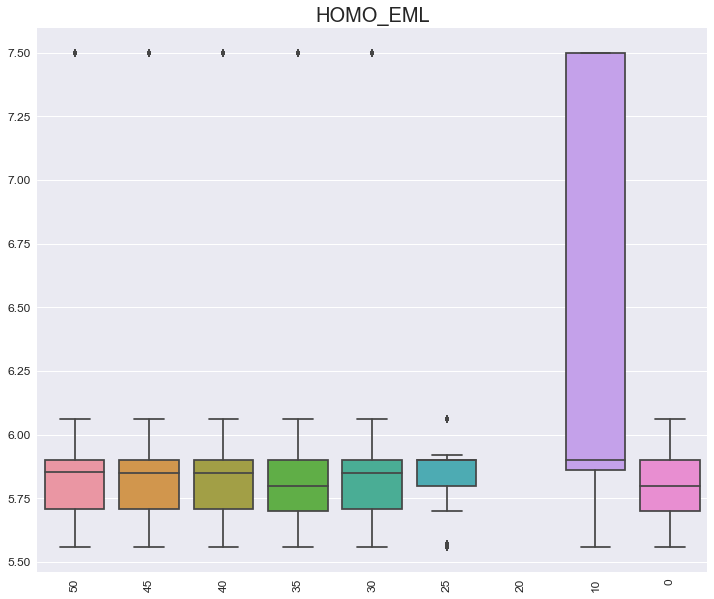

In [27]:
layer('HOMO_EML')

In [28]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.9]
print(triplet3.shape)

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
device.shape

(45600, 32)


(6288, 32)

,50,45,40,35,30,25,20,10,0
count,289.000000,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,2.335571,2.317928,2.238583,2.294204,2.281811,2.133567,NaN,2.339496,2.245608
std,0.116951,0.140500,0.210158,0.181418,0.170675,0.263456,NaN,0.164935,0.200854
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,NaN,1.900000,1.900000
25%,2.260000,2.260000,2.000000,2.200000,2.200000,1.900000,NaN,2.260000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,2.500000,2.500000


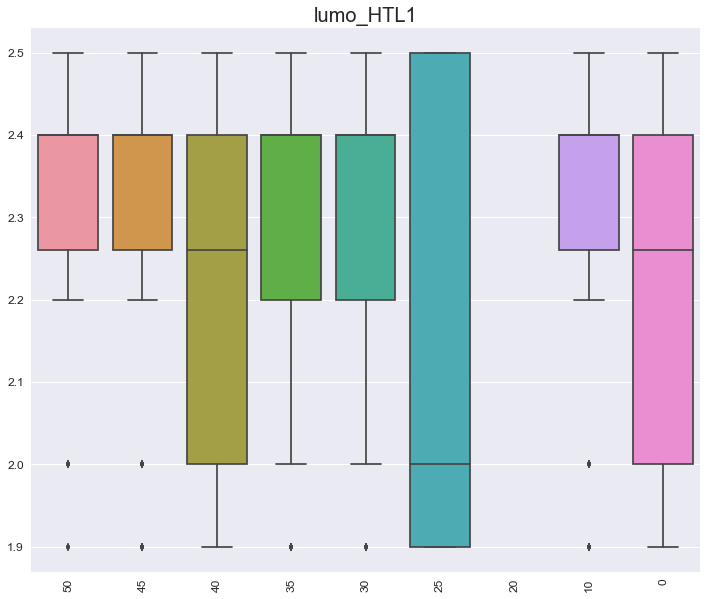

In [29]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,289.000000,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,5.849135,5.820581,5.562322,5.739197,5.695038,5.264633,NaN,5.691009,5.615426
std,0.228235,0.265560,0.305856,0.342384,0.277998,0.202786,NaN,0.335408,0.315665
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.700000,5.700000,5.200000,5.500000,5.500000,5.100000,NaN,5.500000,5.200000
50%,5.900000,5.800000,5.700000,5.800000,5.700000,5.200000,NaN,5.800000,5.700000
75%,6.100000,6.100000,5.800000,6.100000,5.900000,5.500000,NaN,5.900000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,NaN,6.100000,6.100000


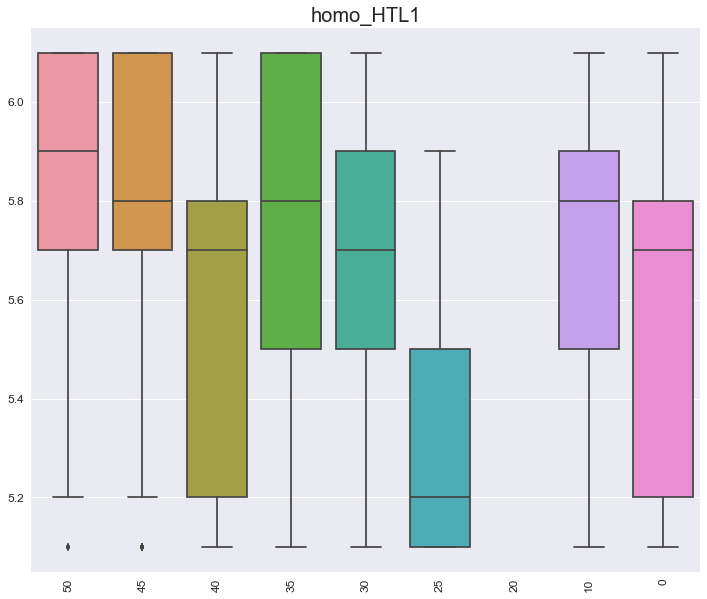

In [30]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,289.000000,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,2.855536,2.812529,2.749918,2.770442,2.794695,2.613798,NaN,2.755954,2.763449
std,0.136508,0.172726,0.231445,0.196021,0.207457,0.226581,NaN,0.256403,0.214549
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.670000,2.670000,2.300000,NaN,2.580000,2.670000
50%,2.940000,2.800000,2.870000,2.800000,2.870000,2.670000,NaN,2.800000,2.870000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,NaN,3.000000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


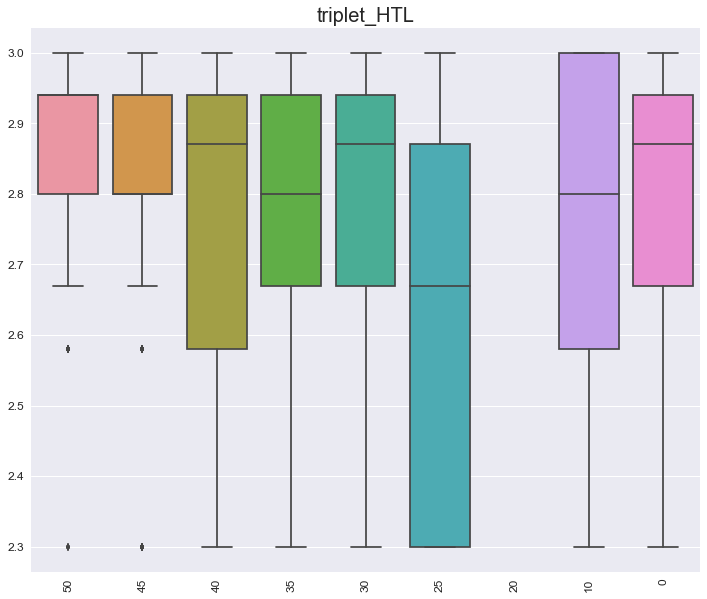

In [31]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.890000e+02,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,3.470000e+00,2.735941,2.850541,2.941484,2.726770,2.852038,NaN,3.156140,3.091858
std,2.001868e-14,0.356171,0.316239,0.444275,0.263617,0.237550,NaN,0.303086,0.292264
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.520000,2.520000,2.730000,NaN,2.800000,2.800000
50%,3.470000e+00,2.700000,2.750000,2.730000,2.700000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,2.750000,2.910000,3.470000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


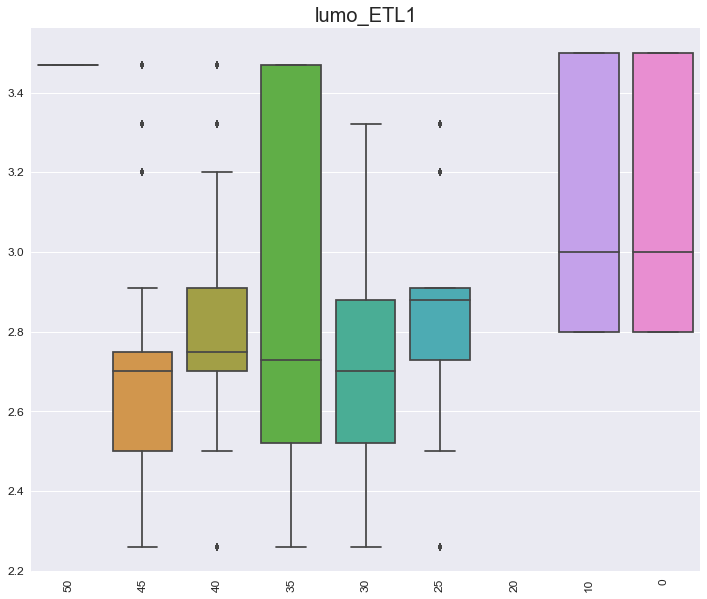

In [32]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,289.0,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,7.5,6.608054,6.536309,6.924443,6.465261,6.351159,NaN,6.598246,6.523919
std,0.0,0.480411,0.442316,0.512032,0.342210,0.327861,NaN,0.351127,0.337301
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.130000,6.120000,6.500000,6.130000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.670000,6.560000,6.800000,6.500000,6.300000,NaN,6.400000,6.400000
75%,7.5,6.800000,6.800000,7.500000,6.790000,6.670000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,NaN,7.000000,7.000000


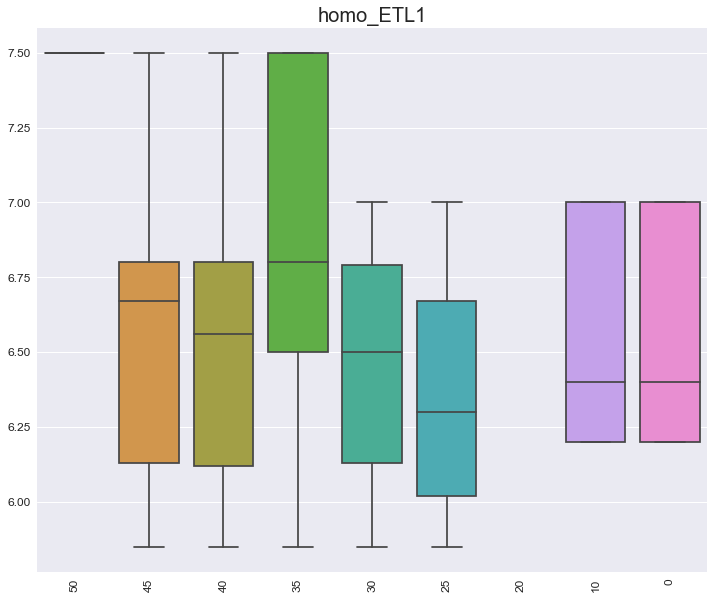

In [33]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.890000e+02,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,2.990000e+00,2.887268,2.838350,2.957717,2.846172,2.769176,NaN,2.569298,2.566285
std,7.117752e-15,0.249948,0.200284,0.239498,0.233725,0.105177,NaN,0.046151,0.047277
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.740000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.990000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.760000,NaN,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


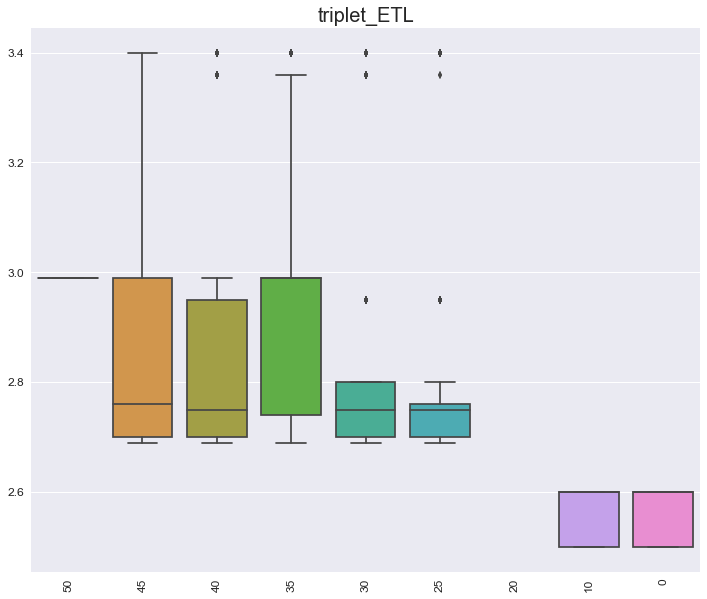

In [34]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,289.000000,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,2.395709,2.424788,2.423559,2.437311,2.420917,2.428367,NaN,2.483936,2.414734
std,0.213843,0.223475,0.238274,0.215904,0.242018,0.198884,NaN,0.214217,0.234401
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.020000,2.020000
25%,2.280000,2.300000,2.280000,2.300000,2.280000,2.300000,NaN,2.400000,2.280000
50%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,NaN,2.400000,2.400000
75%,2.460000,2.460000,2.550000,2.460000,2.550000,2.550000,NaN,2.550000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


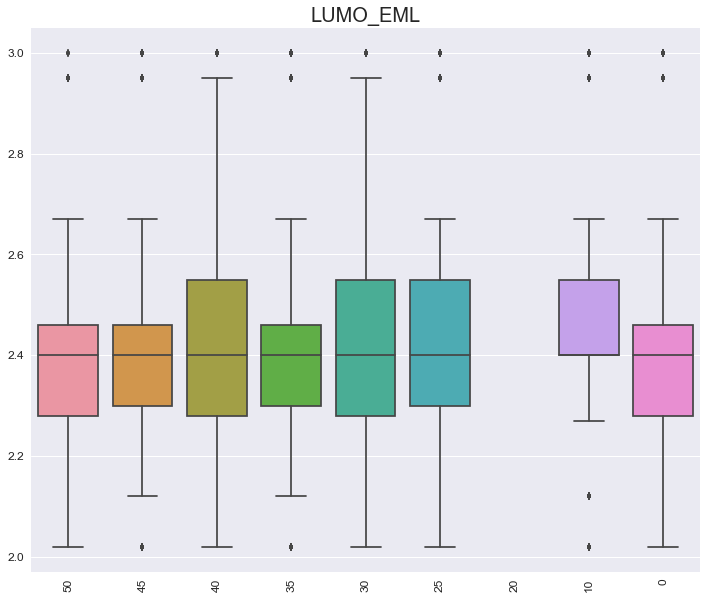

In [35]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,289.000000,3649.000000,9714.000000,1967.000000,18158.000000,4623.000000,0.0,912.000000,6288.000000
mean,6.028685,6.059833,5.849628,6.238210,5.878992,5.864242,NaN,6.528739,5.816252
std,0.603982,0.609094,0.235715,0.763229,0.343014,0.096778,NaN,0.790268,0.121154
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.560000,5.560000
25%,5.710000,5.710000,5.800000,5.710000,5.710000,5.850000,NaN,5.900000,5.710000
50%,5.850000,5.900000,5.860000,5.900000,5.860000,5.900000,NaN,6.060000,5.850000
75%,5.900000,5.900000,5.900000,7.500000,5.900000,5.900000,NaN,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,6.060000


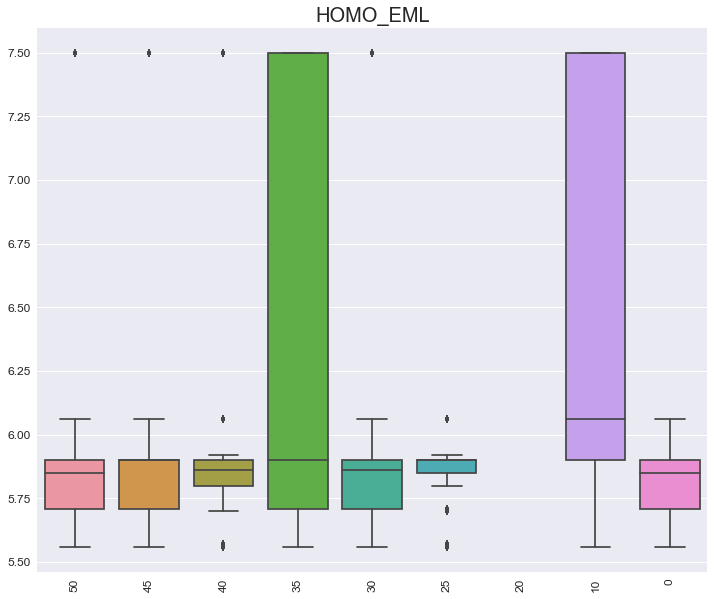

In [36]:
layer('HOMO_EML')

In [37]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.85]
print(triplet3.shape)

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
device.shape

(38760, 32)


(5721, 32)

,50,45,40,35,30,25,20,10,0
count,217.000000,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,2.336590,2.319217,2.244546,2.275147,2.285488,2.150692,NaN,2.284511,2.255616
std,0.118827,0.144686,0.206006,0.192798,0.164080,0.265657,NaN,0.184510,0.199982
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,NaN,1.900000,1.900000
25%,2.260000,2.260000,2.000000,2.200000,2.200000,1.900000,NaN,2.200000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,2.500000,2.500000


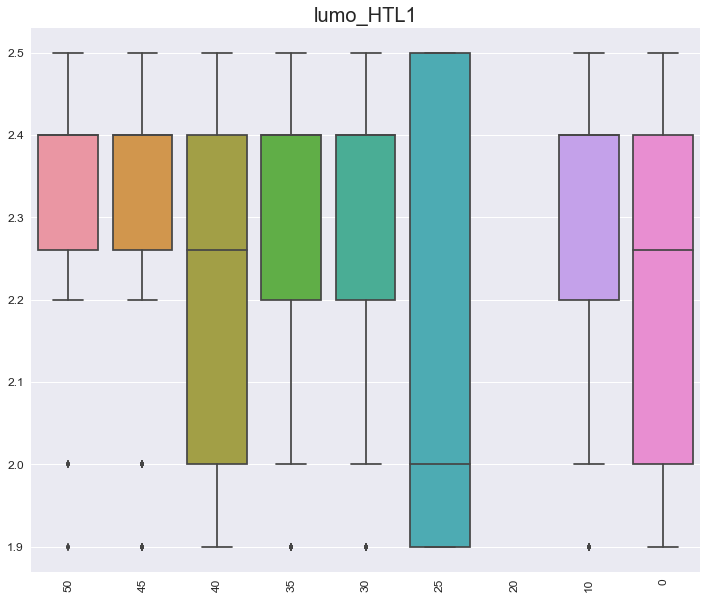

In [38]:
# levels = ['lumo_HTL1', 'homo_HTL1', 'triplet_HTL', 'lumo_ETL1', 'homo_ETL1', 'triplet_ETL', 'LUMO_EML', 'HOMO_EML']
# for level in levels:
#     layer(level)
layer('lumo_HTL1')


,50,45,40,35,30,25,20,10,0
count,217.000000,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,5.844240,5.825198,5.580661,5.688011,5.718044,5.275695,NaN,5.676441,5.621412
std,0.244337,0.280732,0.306295,0.347228,0.268128,0.212121,NaN,0.306703,0.319776
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.700000,5.700000,5.200000,5.500000,5.700000,5.100000,NaN,5.500000,5.200000
50%,5.800000,5.900000,5.700000,5.700000,5.700000,5.200000,NaN,5.700000,5.700000
75%,6.100000,6.100000,5.800000,6.100000,5.900000,5.500000,NaN,5.900000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,NaN,6.100000,6.100000


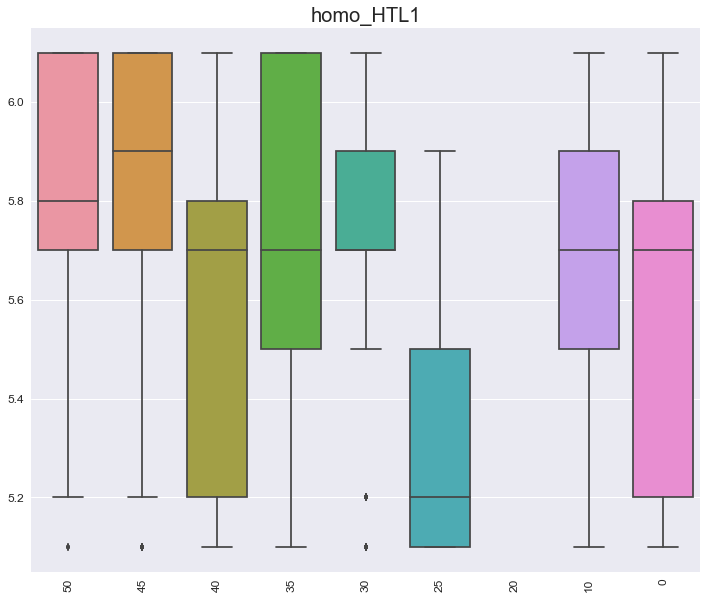

In [39]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,217.000000,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,2.850922,2.806664,2.756728,2.756698,2.806063,2.607024,NaN,2.789699,2.760603
std,0.135384,0.170231,0.229115,0.206333,0.197130,0.231915,NaN,0.220228,0.220186
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.670000,2.670000,2.300000,NaN,2.670000,2.580000
50%,2.870000,2.800000,2.870000,2.800000,2.870000,2.670000,NaN,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,NaN,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


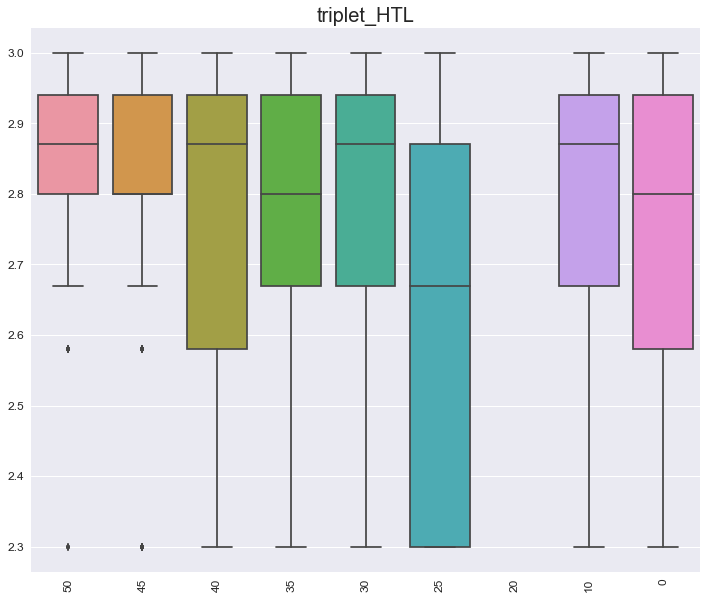

In [40]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.170000e+02,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,3.470000e+00,2.789167,2.825328,3.053618,2.722828,2.833874,NaN,3.133333,3.097675
std,1.780464e-14,0.390943,0.311726,0.445318,0.261943,0.246705,NaN,0.301448,0.293805
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.500000,2.600000,2.600000,2.520000,2.700000,NaN,2.800000,2.800000
50%,3.470000e+00,2.700000,2.730000,3.320000,2.700000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,2.910000,2.910000,3.470000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


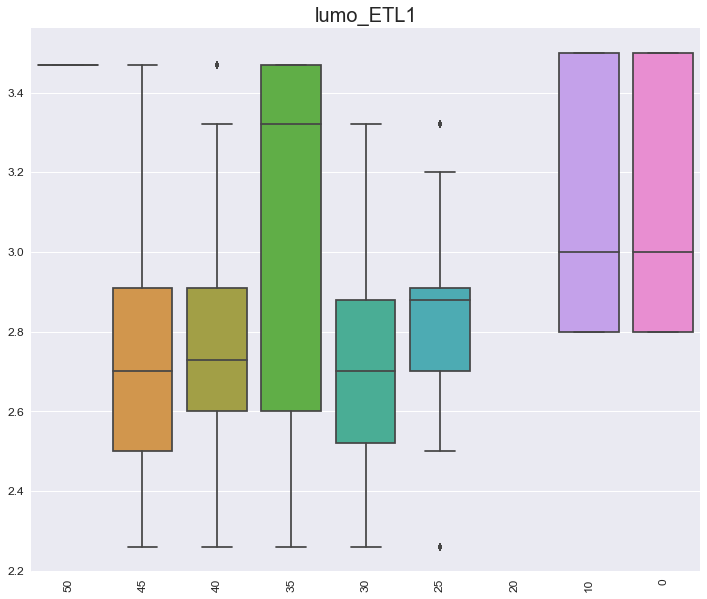

In [41]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,217.0,2401.000000,8930.000000,1393.00000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,7.5,6.671404,6.521933,7.05323,6.471328,6.350440,NaN,6.571930,6.530641
std,0.0,0.510853,0.429779,0.49069,0.341516,0.327293,NaN,0.348744,0.339209
min,7.5,5.850000,5.850000,5.85000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.300000,6.120000,6.79000,6.130000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.680000,6.560000,7.00000,6.500000,6.300000,NaN,6.400000,6.400000
75%,7.5,6.800000,6.790000,7.50000,6.790000,6.670000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.50000,7.000000,7.000000,NaN,7.000000,7.000000


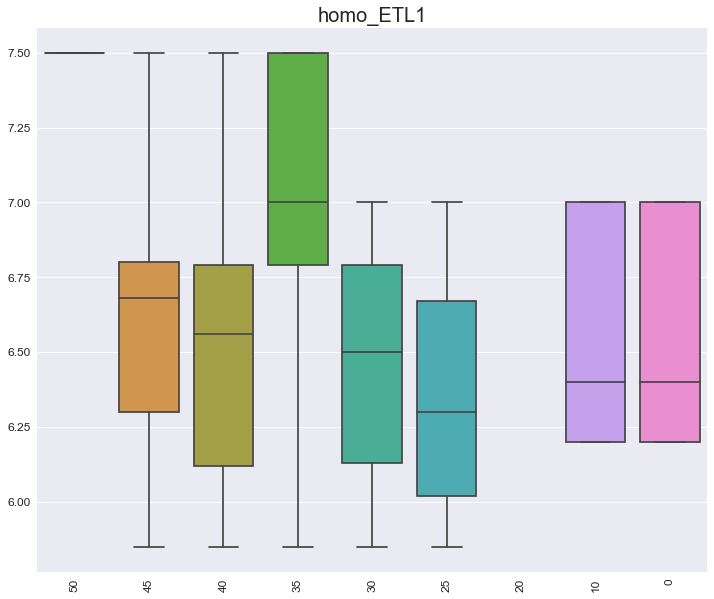

In [42]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.170000e+02,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,2.990000e+00,2.896472,2.839245,2.972498,2.850043,2.772428,NaN,2.568421,2.566544
std,6.676740e-15,0.243456,0.206653,0.216661,0.238041,0.115081,NaN,0.046541,0.047188
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.760000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.990000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.760000,NaN,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


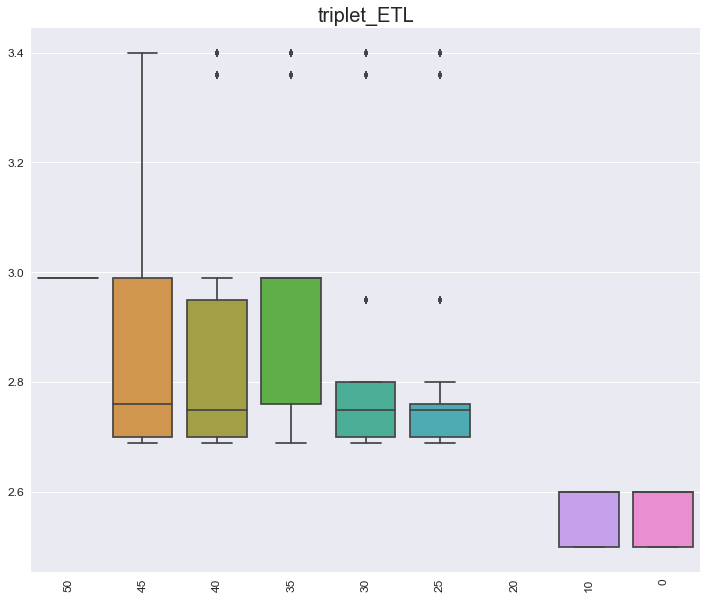

In [43]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,217.000000,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,2.413318,2.423407,2.417497,2.429160,2.418278,2.417929,NaN,2.430075,2.418039
std,0.229962,0.233680,0.256517,0.216376,0.260243,0.225945,NaN,0.128081,0.257128
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.300000,2.020000
25%,2.300000,2.300000,2.270000,2.300000,2.280000,2.280000,NaN,2.400000,2.270000
50%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,NaN,2.400000,2.300000
75%,2.460000,2.460000,2.460000,2.460000,2.460000,2.550000,NaN,2.400000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,2.950000,3.000000


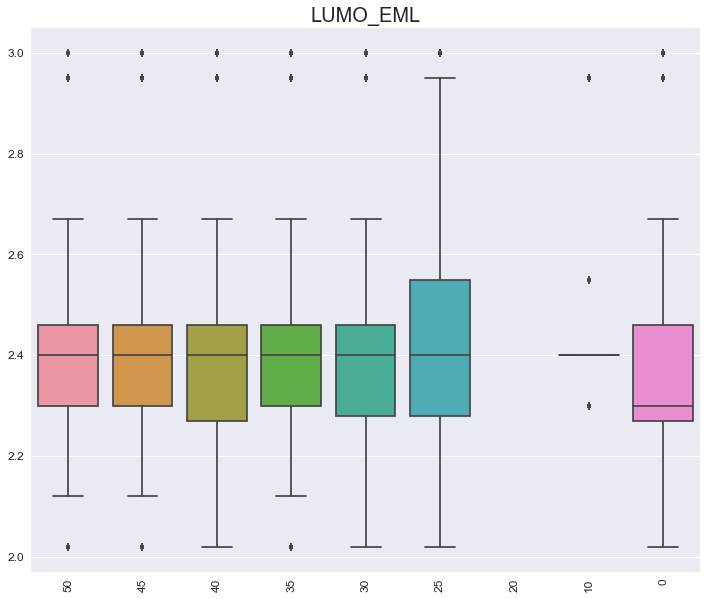

In [44]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,217.000000,2401.000000,8930.000000,1393.000000,15058.000000,4641.000000,0.0,399.000000,5721.000000
mean,6.102673,6.144877,5.844819,6.315800,5.886292,5.843469,NaN,7.307820,5.809995
std,0.677636,0.697295,0.274502,0.791562,0.397345,0.111418,NaN,0.509238,0.148121
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.860000,5.560000
25%,5.700000,5.710000,5.710000,5.710000,5.700000,5.800000,NaN,7.500000,5.700000
50%,5.850000,5.860000,5.850000,5.900000,5.800000,5.900000,NaN,7.500000,5.800000
75%,6.060000,6.060000,5.900000,7.500000,5.900000,5.900000,NaN,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,7.500000


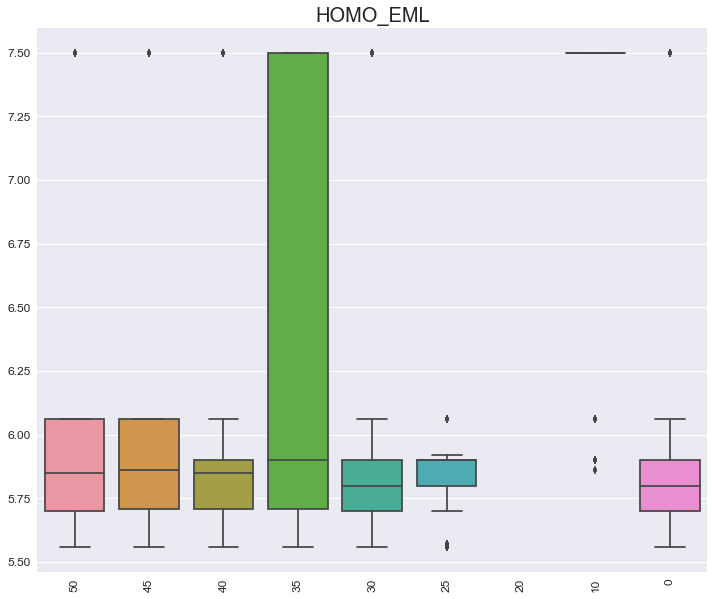

In [45]:
layer('HOMO_EML')

In [46]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.8]
print(triplet3.shape)

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
device.shape

(41040, 32)


(6088, 32)

,50,45,40,35,30,25,20,10,0
count,221.000000,2231.000000,9764.000000,1307.000000,15726.000000,5311.00000,0.0,392.000000,6088.000000
mean,2.343439,2.317687,2.247233,2.261729,2.289842,2.15071,NaN,2.282449,2.255894
std,0.111089,0.151692,0.203646,0.201747,0.161150,0.26105,NaN,0.185500,0.199876
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.90000,NaN,1.900000,1.900000
25%,2.260000,2.260000,2.000000,2.100000,2.200000,1.90000,NaN,2.200000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.00000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.50000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.50000,NaN,2.500000,2.500000


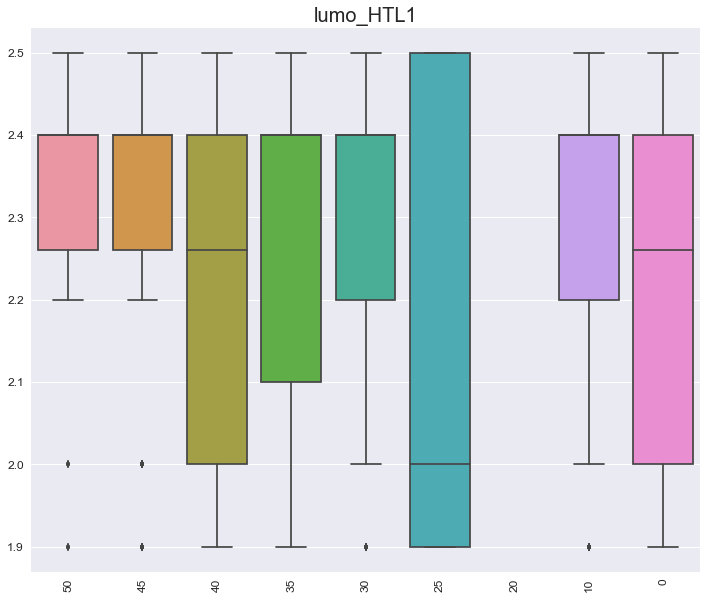

In [47]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,221.000000,2231.000000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,5.854751,5.820843,5.589605,5.650191,5.725016,5.295895,NaN,5.671939,5.621978
std,0.241844,0.293884,0.306563,0.348995,0.266607,0.228880,NaN,0.307416,0.319736
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.700000,5.700000,5.200000,5.200000,5.700000,5.100000,NaN,5.500000,5.200000
50%,5.900000,5.900000,5.700000,5.700000,5.700000,5.200000,NaN,5.700000,5.700000
75%,6.100000,6.100000,5.800000,5.900000,5.900000,5.500000,NaN,5.900000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,NaN,6.100000,6.100000


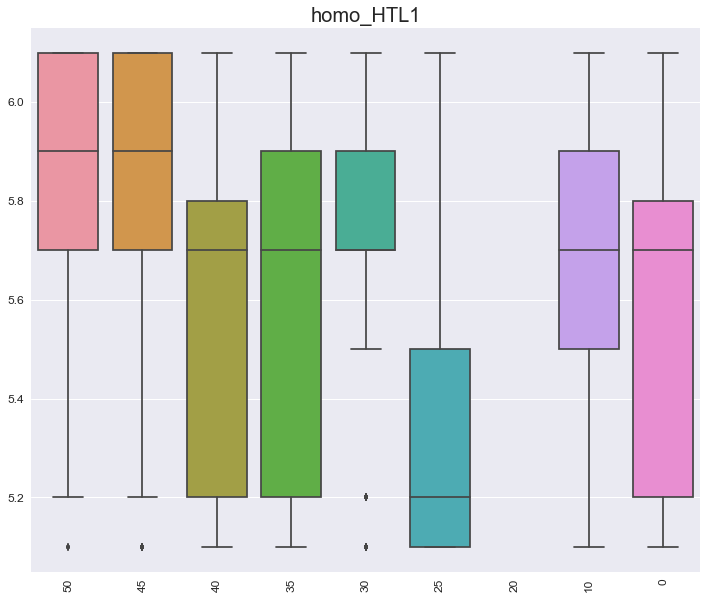

In [48]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,221.000000,2231.000000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,2.852489,2.799592,2.759606,2.745073,2.807177,2.620495,NaN,2.786454,2.760958
std,0.133983,0.173328,0.227395,0.212621,0.196902,0.233093,NaN,0.220634,0.220193
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.670000,2.670000,2.300000,NaN,2.670000,2.580000
50%,2.870000,2.800000,2.870000,2.800000,2.870000,2.670000,NaN,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,NaN,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


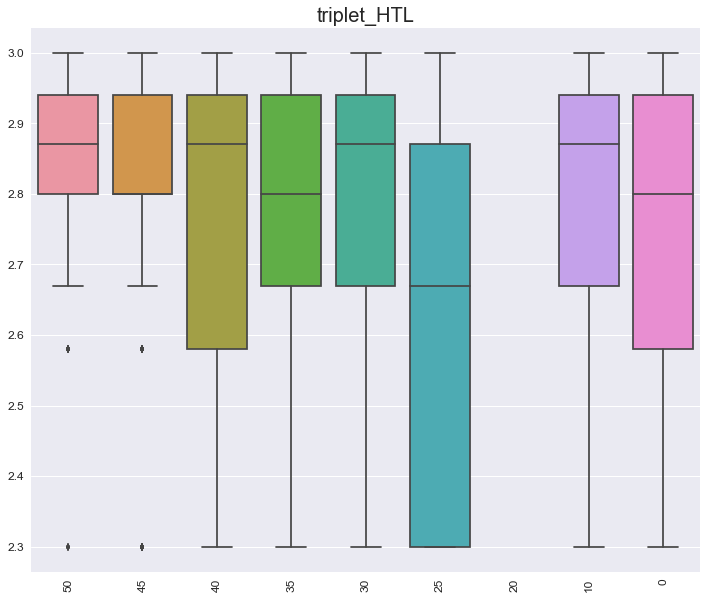

In [49]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.210000e+02,2231.00000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,3.470000e+00,2.81121,2.818972,3.116863,2.718711,2.834248,NaN,3.129337,3.098111
std,1.780389e-14,0.40955,0.309380,0.438041,0.262514,0.241657,NaN,0.301117,0.293903
min,3.470000e+00,2.26000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.50000,2.600000,2.600000,2.520000,2.700000,NaN,2.800000,2.800000
50%,3.470000e+00,2.70000,2.730000,3.470000,2.700000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,3.20000,2.910000,3.470000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.47000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


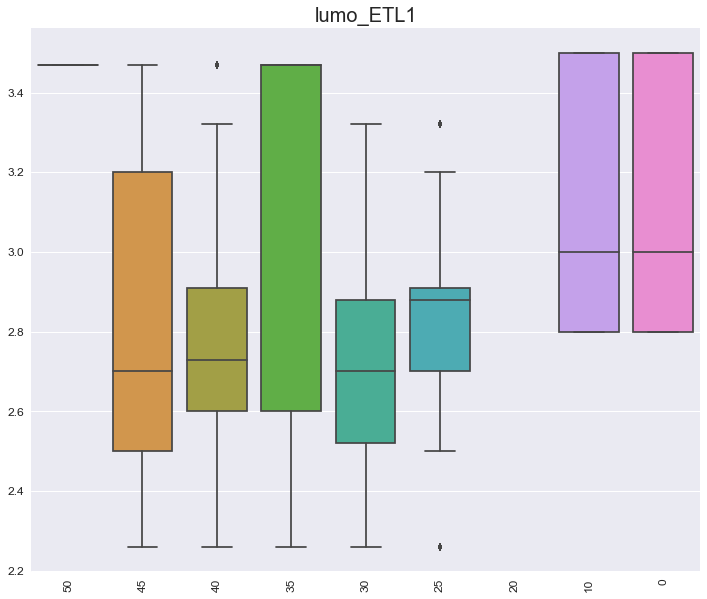

In [50]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,221.0,2231.000000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,7.5,6.720986,6.515115,7.137077,6.478146,6.339241,NaN,6.567347,6.531143
std,0.0,0.519618,0.426137,0.452968,0.340647,0.324289,NaN,0.348259,0.339332
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.500000,6.120000,6.800000,6.130000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.790000,6.500000,7.500000,6.500000,6.300000,NaN,6.400000,6.400000
75%,7.5,7.000000,6.790000,7.500000,6.790000,6.560000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,NaN,7.000000,7.000000


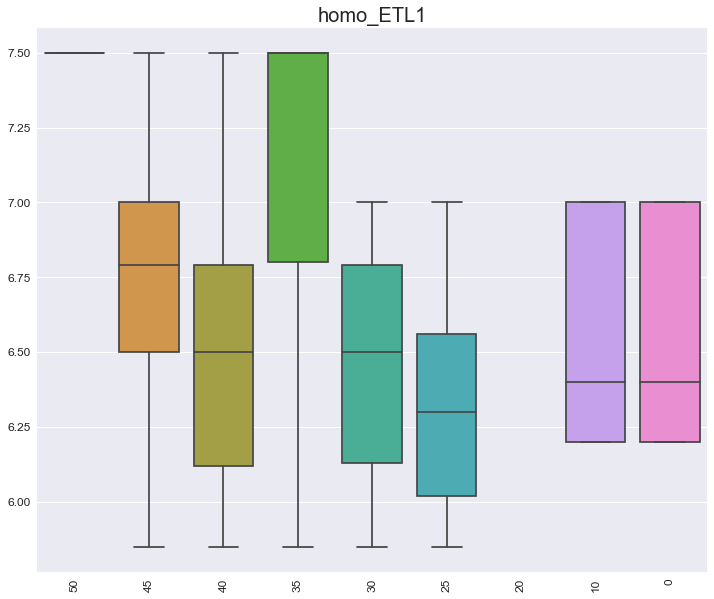

In [51]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.210000e+02,2231.00000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,2.990000e+00,2.91320,2.837208,2.991025,2.853145,2.768656,NaN,2.568367,2.566557
std,6.676460e-15,0.24663,0.206111,0.203916,0.240884,0.107619,NaN,0.046564,0.047183
min,2.990000e+00,2.69000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.70000,2.700000,2.950000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.80000,2.750000,2.990000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.99000,2.800000,2.990000,2.800000,2.760000,NaN,2.600000,2.600000
max,2.990000e+00,3.40000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


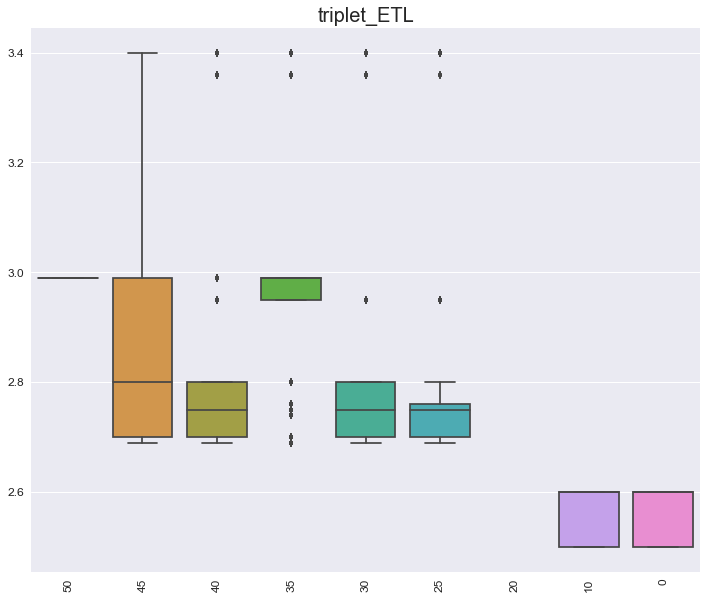

In [52]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,221.000000,2231.000000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,2.401538,2.418306,2.399049,2.406549,2.403904,2.395283,NaN,2.430740,2.400386
std,0.239845,0.233197,0.258437,0.212042,0.262397,0.231901,NaN,0.125487,0.259096
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.300000,2.020000
25%,2.280000,2.300000,2.270000,2.300000,2.270000,2.270000,NaN,2.400000,2.270000
50%,2.400000,2.400000,2.300000,2.400000,2.300000,2.300000,NaN,2.400000,2.300000
75%,2.460000,2.460000,2.460000,2.460000,2.460000,2.460000,NaN,2.400000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,2.950000,3.000000


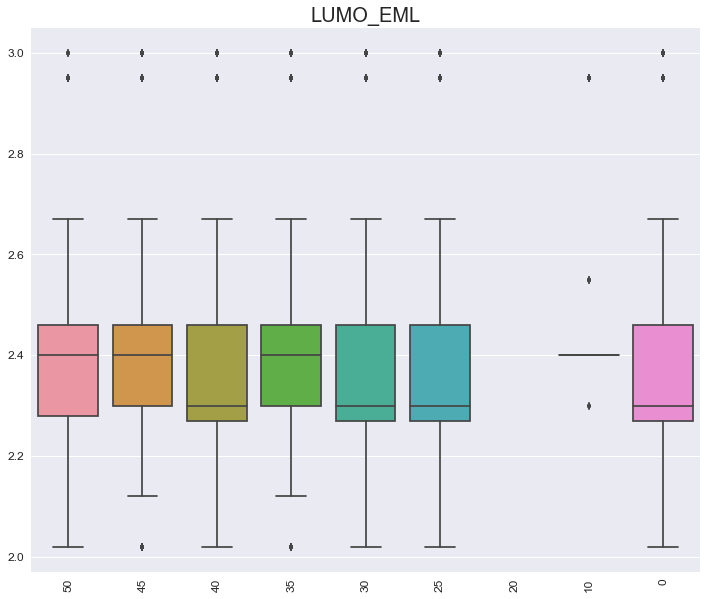

In [53]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,221.000000,2231.000000,9764.000000,1307.000000,15726.000000,5311.000000,0.0,392.000000,6088.000000
mean,6.083575,6.175957,5.824743,6.297276,5.874660,5.819757,NaN,7.332857,5.795913
std,0.680877,0.720230,0.267792,0.787919,0.403007,0.127830,NaN,0.477562,0.154404
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.860000,5.560000
25%,5.700000,5.710000,5.700000,5.710000,5.700000,5.800000,NaN,7.500000,5.700000
50%,5.800000,5.860000,5.800000,5.900000,5.800000,5.860000,NaN,7.500000,5.800000
75%,6.060000,6.060000,5.900000,7.500000,5.900000,5.900000,NaN,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,7.500000


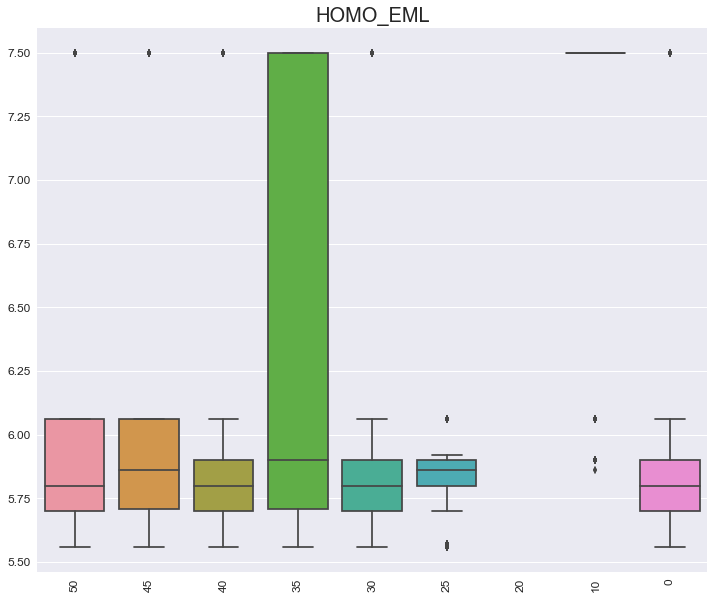

In [54]:
layer('HOMO_EML')

In [55]:
triplet = new_X.loc[new_X['triplet_HOST'] == 2.75]
print(triplet3.shape)

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
device.shape

(38760, 32)


(5648, 32)

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.257500,2.264688,2.299758,2.194061,2.335279,2.240171,2.136609,2.294746,2.254387
std,0.201644,0.196657,0.153920,0.238033,0.125303,0.205147,0.289182,0.180246,0.200322
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.150000,2.200000,2.200000,2.000000,2.260000,2.000000,1.900000,2.200000,2.000000
50%,2.330000,2.400000,2.400000,2.200000,2.400000,2.260000,1.900000,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


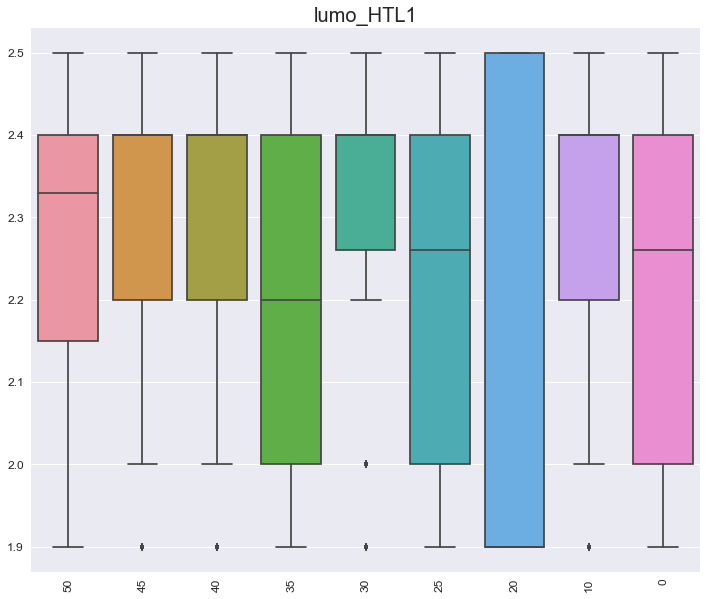

In [56]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.00000,5648.000000
mean,5.625000,5.648961,5.750793,5.436162,5.852701,5.578784,5.158320,5.71250,5.617688
std,0.323245,0.328182,0.260797,0.303141,0.242313,0.303536,0.096887,0.31284,0.318672
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.10000,5.100000
25%,5.425000,5.500000,5.700000,5.200000,5.700000,5.200000,5.100000,5.50000,5.200000
50%,5.700000,5.700000,5.700000,5.500000,5.900000,5.700000,5.100000,5.80000,5.700000
75%,5.825000,5.900000,5.900000,5.700000,6.100000,5.800000,5.200000,5.90000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,5.800000,6.10000,6.100000


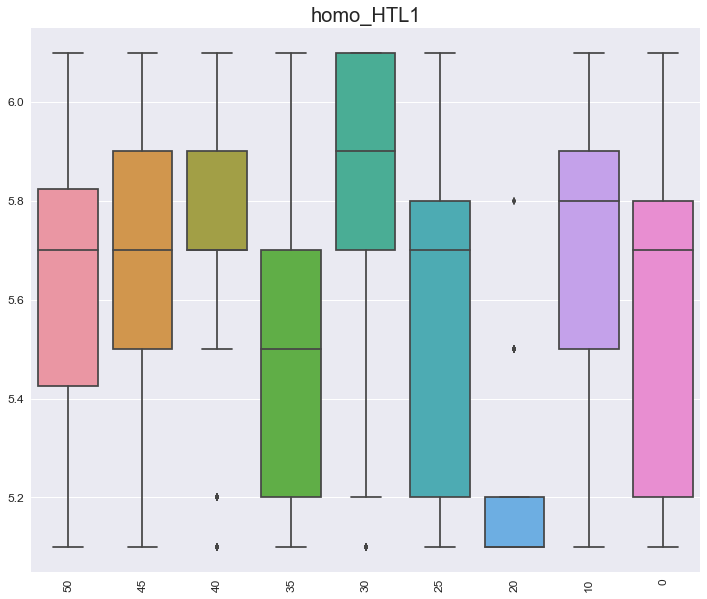

In [57]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.762500,2.764392,2.820936,2.676197,2.845057,2.748091,2.535325,2.801356,2.759253
std,0.223076,0.214958,0.187196,0.237112,0.151177,0.228305,0.190598,0.211283,0.220732
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.647500,2.670000,2.800000,2.580000,2.800000,2.580000,2.300000,2.670000,2.580000
50%,2.835000,2.800000,2.870000,2.670000,2.870000,2.870000,2.670000,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.870000,2.940000,2.940000,2.670000,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.870000,3.000000,3.000000


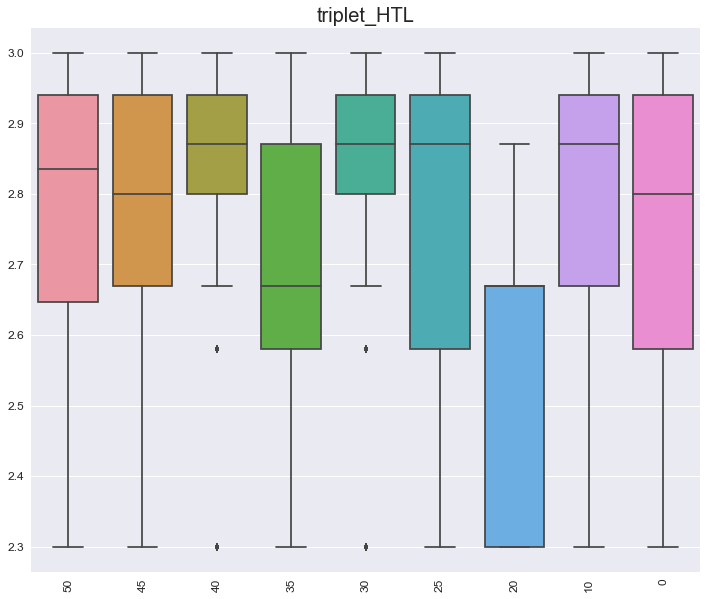

In [58]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,3.470000e+00,3.427329,2.705126,3.016859,2.640708,2.769360,2.894231,3.158263,3.095131
std,4.497466e-16,0.191438,0.269510,0.346842,0.213150,0.269638,0.168180,0.304209,0.293087
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000,2.800000
25%,3.470000e+00,3.470000,2.500000,2.730000,2.500000,2.600000,2.880000,2.800000,2.800000
50%,3.470000e+00,3.470000,2.700000,2.880000,2.600000,2.730000,2.880000,3.000000,3.000000
75%,3.470000e+00,3.470000,2.750000,3.470000,2.730000,2.880000,2.910000,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000,3.500000


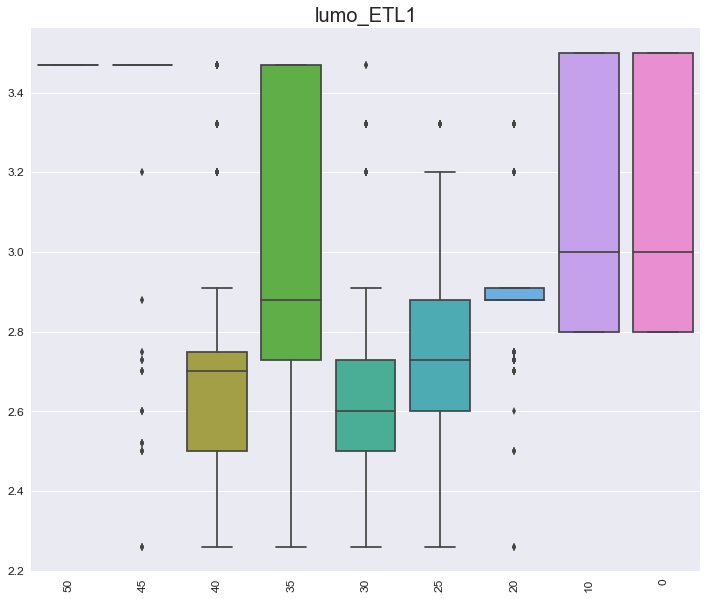

In [59]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,40.0,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,7.5,7.449748,6.492867,6.689572,6.584006,6.416979,6.280301,6.600847,6.527691
std,0.0,0.233763,0.357431,0.572804,0.310782,0.342288,0.278291,0.352364,0.338328
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000,6.200000
25%,7.5,7.500000,6.130000,6.130000,6.500000,6.120000,6.020000,6.200000,6.200000
50%,7.5,7.500000,6.500000,6.560000,6.790000,6.500000,6.130000,6.400000,6.400000
75%,7.5,7.500000,6.800000,7.500000,6.800000,6.680000,6.560000,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000


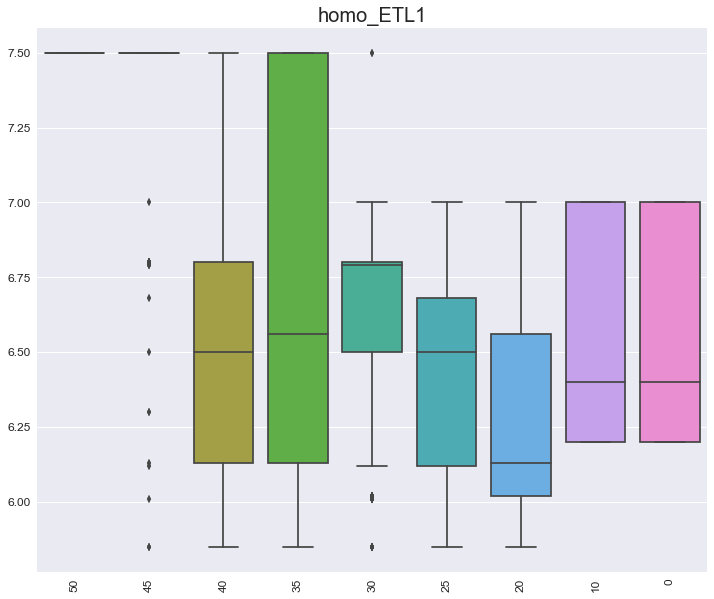

In [60]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.990000e+00,2.986721,2.863814,2.839201,2.940163,2.809786,2.747765,2.569915,2.566395
std,1.798987e-15,0.067995,0.247698,0.152221,0.300798,0.188570,0.070300,0.045911,0.047240
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000
25%,2.990000e+00,2.990000,2.700000,2.700000,2.700000,2.700000,2.700000,2.500000,2.500000
50%,2.990000e+00,2.990000,2.750000,2.750000,2.760000,2.750000,2.750000,2.600000,2.600000
75%,2.990000e+00,2.990000,2.800000,2.990000,3.360000,2.800000,2.750000,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.950000,2.600000,2.600000


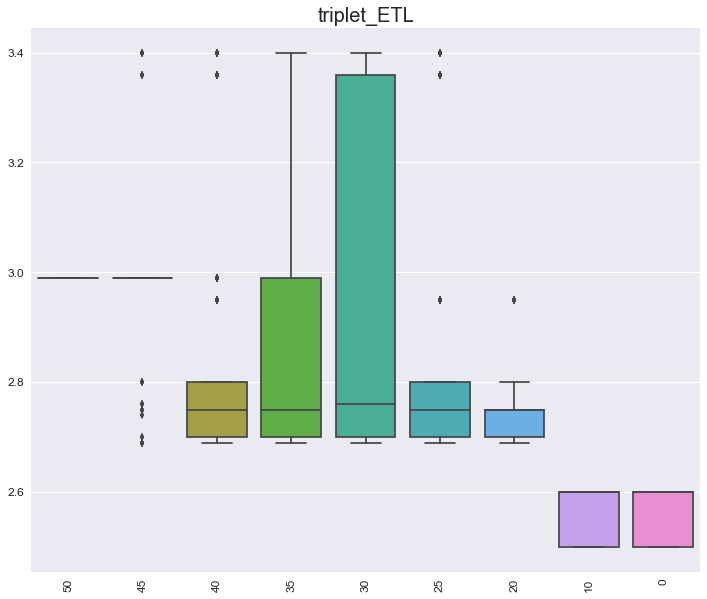

In [61]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.400000e+00,2.418991,2.403079,2.442037,2.405851,2.420417,2.471791,2.435148,2.417459
std,1.349240e-15,0.252032,0.242543,0.261561,0.235831,0.255106,0.236500,0.159382,0.256890
min,2.400000e+00,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.400000e+00,2.280000,2.280000,2.280000,2.280000,2.280000,2.300000,2.400000,2.270000
50%,2.400000e+00,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.300000
75%,2.400000e+00,2.460000,2.460000,2.550000,2.460000,2.550000,2.670000,2.400000,2.460000
max,2.400000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


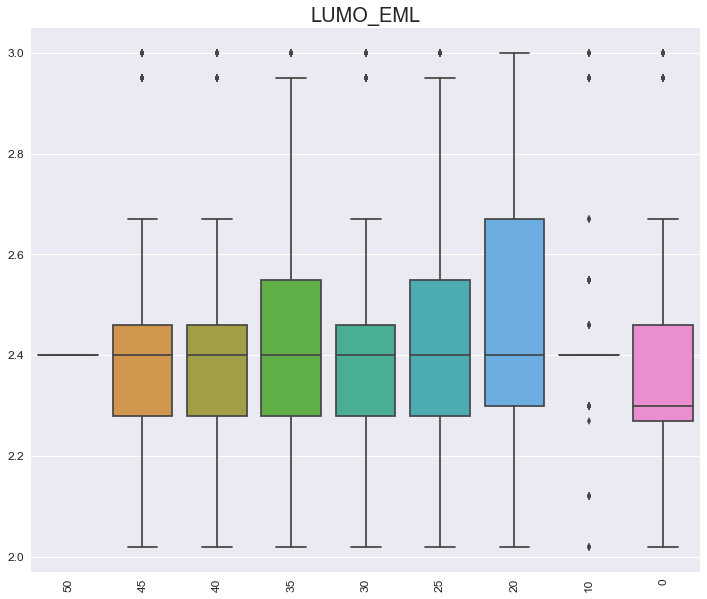

In [62]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,40.0,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,7.5,5.893472,5.962983,5.814334,6.212240,5.822501,5.854326,7.095636,5.808368
std,0.0,0.391286,0.511244,0.122426,0.755413,0.182147,0.099156,0.704600,0.139474
min,7.5,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,7.5,5.710000,5.710000,5.710000,5.700000,5.710000,5.800000,7.140000,5.700000
50%,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,5.900000,7.500000,5.800000
75%,7.5,5.900000,5.900000,5.900000,7.500000,5.900000,5.920000,7.500000,5.900000
max,7.5,7.500000,7.500000,6.060000,7.500000,7.500000,6.060000,7.500000,7.500000


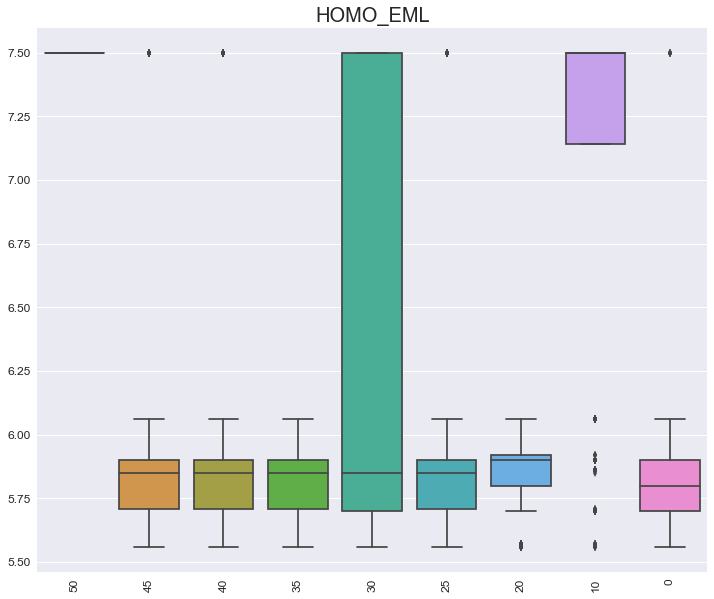

In [63]:
layer('HOMO_EML')

In [64]:
triplet = new_X.loc[new_X['triplet_HOST'] == 2.7]
print(triplet3.shape)

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
device.shape

(38760, 32)


(5648, 32)

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.257500,2.264688,2.299758,2.194061,2.335279,2.240171,2.136609,2.294746,2.254387
std,0.201644,0.196657,0.153920,0.238033,0.125303,0.205147,0.289182,0.180246,0.200322
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.150000,2.200000,2.200000,2.000000,2.260000,2.000000,1.900000,2.200000,2.000000
50%,2.330000,2.400000,2.400000,2.200000,2.400000,2.260000,1.900000,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


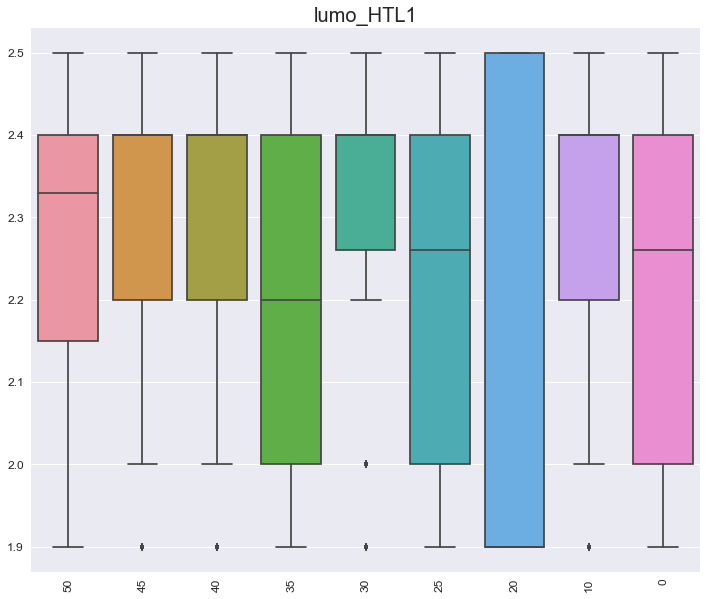

In [65]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.00000,5648.000000
mean,5.625000,5.648961,5.750793,5.436162,5.852701,5.578784,5.158320,5.71250,5.617688
std,0.323245,0.328182,0.260797,0.303141,0.242313,0.303536,0.096887,0.31284,0.318672
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.10000,5.100000
25%,5.425000,5.500000,5.700000,5.200000,5.700000,5.200000,5.100000,5.50000,5.200000
50%,5.700000,5.700000,5.700000,5.500000,5.900000,5.700000,5.100000,5.80000,5.700000
75%,5.825000,5.900000,5.900000,5.700000,6.100000,5.800000,5.200000,5.90000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,5.800000,6.10000,6.100000


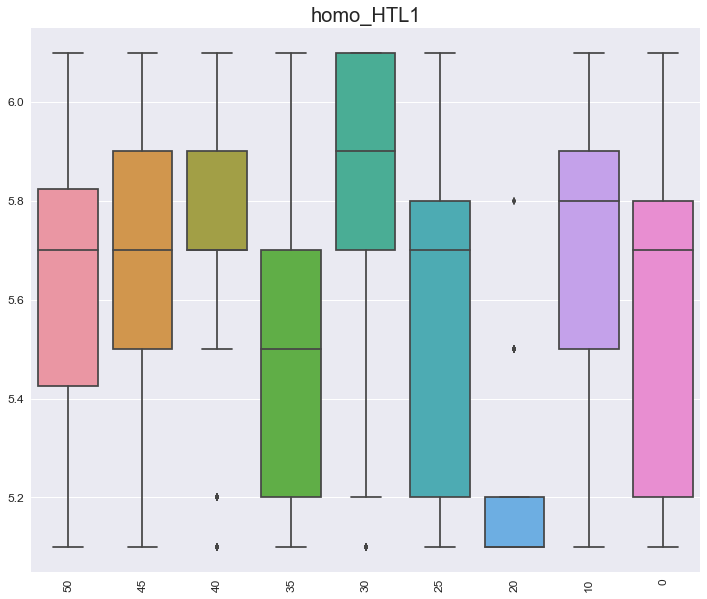

In [66]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.762500,2.764392,2.820936,2.676197,2.845057,2.748091,2.535325,2.801356,2.759253
std,0.223076,0.214958,0.187196,0.237112,0.151177,0.228305,0.190598,0.211283,0.220732
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.647500,2.670000,2.800000,2.580000,2.800000,2.580000,2.300000,2.670000,2.580000
50%,2.835000,2.800000,2.870000,2.670000,2.870000,2.870000,2.670000,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.870000,2.940000,2.940000,2.670000,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.870000,3.000000,3.000000


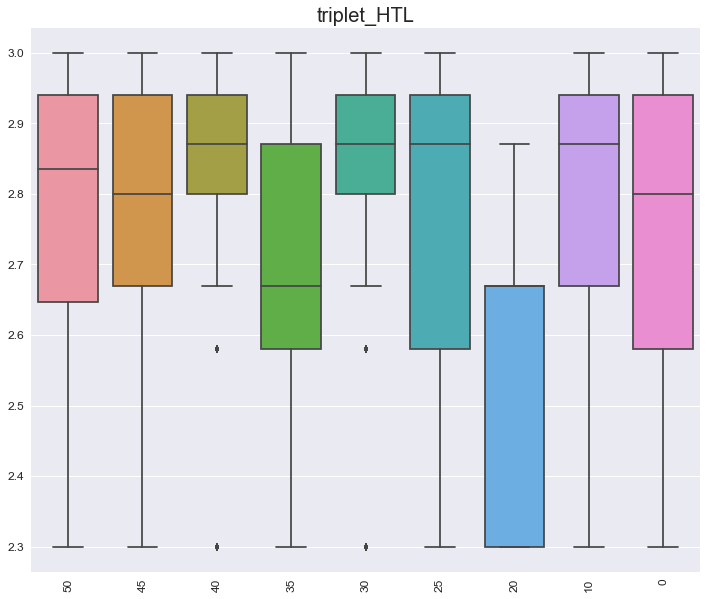

In [67]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,3.470000e+00,3.427329,2.705126,3.016859,2.640708,2.769360,2.894231,3.158263,3.095131
std,4.497466e-16,0.191438,0.269510,0.346842,0.213150,0.269638,0.168180,0.304209,0.293087
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000,2.800000
25%,3.470000e+00,3.470000,2.500000,2.730000,2.500000,2.600000,2.880000,2.800000,2.800000
50%,3.470000e+00,3.470000,2.700000,2.880000,2.600000,2.730000,2.880000,3.000000,3.000000
75%,3.470000e+00,3.470000,2.750000,3.470000,2.730000,2.880000,2.910000,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000,3.500000


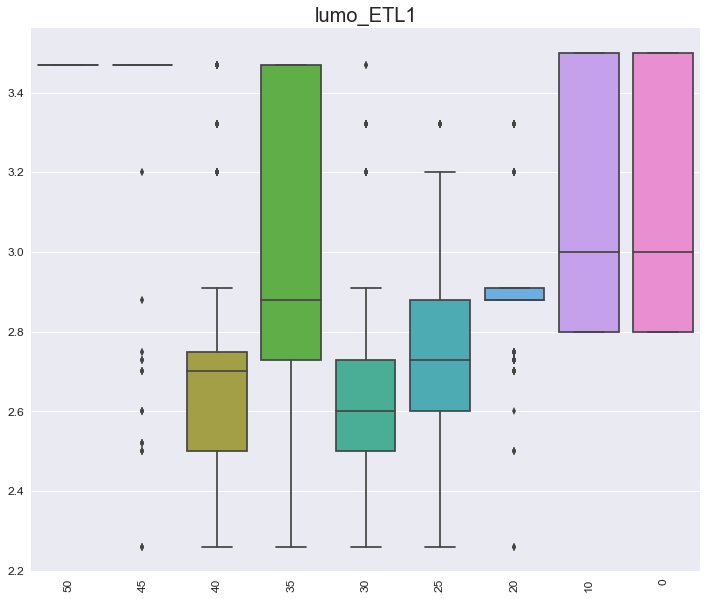

In [68]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,40.0,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,7.5,7.449748,6.492867,6.689572,6.584006,6.416979,6.280301,6.600847,6.527691
std,0.0,0.233763,0.357431,0.572804,0.310782,0.342288,0.278291,0.352364,0.338328
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000,6.200000
25%,7.5,7.500000,6.130000,6.130000,6.500000,6.120000,6.020000,6.200000,6.200000
50%,7.5,7.500000,6.500000,6.560000,6.790000,6.500000,6.130000,6.400000,6.400000
75%,7.5,7.500000,6.800000,7.500000,6.800000,6.680000,6.560000,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000


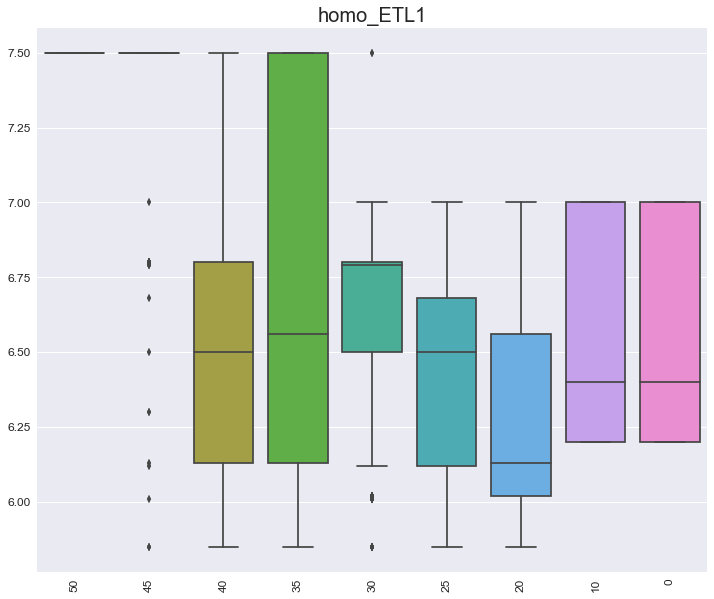

In [69]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.990000e+00,2.986721,2.863814,2.839201,2.940163,2.809786,2.747765,2.569915,2.566395
std,1.798987e-15,0.067995,0.247698,0.152221,0.300798,0.188570,0.070300,0.045911,0.047240
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000
25%,2.990000e+00,2.990000,2.700000,2.700000,2.700000,2.700000,2.700000,2.500000,2.500000
50%,2.990000e+00,2.990000,2.750000,2.750000,2.760000,2.750000,2.750000,2.600000,2.600000
75%,2.990000e+00,2.990000,2.800000,2.990000,3.360000,2.800000,2.750000,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.950000,2.600000,2.600000


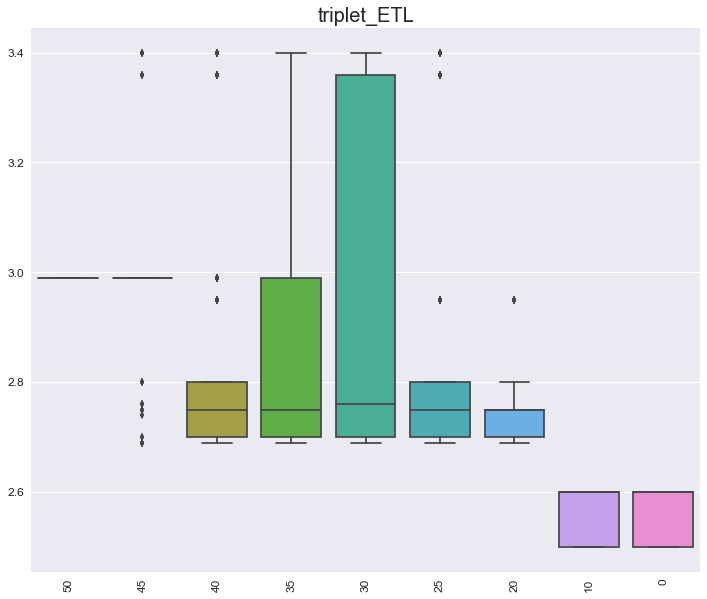

In [70]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.400000e+00,2.418991,2.403079,2.442037,2.405851,2.420417,2.471791,2.435148,2.417459
std,1.349240e-15,0.252032,0.242543,0.261561,0.235831,0.255106,0.236500,0.159382,0.256890
min,2.400000e+00,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.400000e+00,2.280000,2.280000,2.280000,2.280000,2.280000,2.300000,2.400000,2.270000
50%,2.400000e+00,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.300000
75%,2.400000e+00,2.460000,2.460000,2.550000,2.460000,2.550000,2.670000,2.400000,2.460000
max,2.400000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


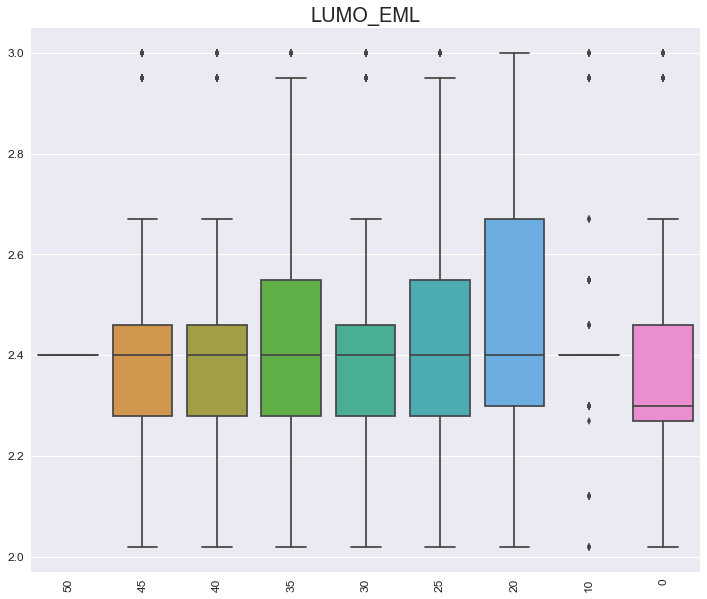

In [71]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,40.0,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,7.5,5.893472,5.962983,5.814334,6.212240,5.822501,5.854326,7.095636,5.808368
std,0.0,0.391286,0.511244,0.122426,0.755413,0.182147,0.099156,0.704600,0.139474
min,7.5,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,7.5,5.710000,5.710000,5.710000,5.700000,5.710000,5.800000,7.140000,5.700000
50%,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,5.900000,7.500000,5.800000
75%,7.5,5.900000,5.900000,5.900000,7.500000,5.900000,5.920000,7.500000,5.900000
max,7.5,7.500000,7.500000,6.060000,7.500000,7.500000,6.060000,7.500000,7.500000


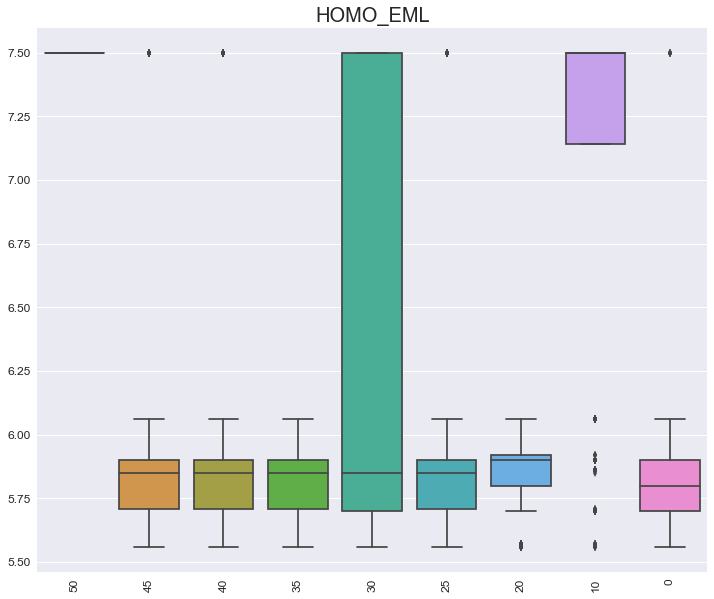

In [72]:
layer('HOMO_EML')

In [73]:
triplet = new_X.loc[new_X['triplet_HOST'] == 2.65]
print(triplet3.shape)

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 20)]
device = triplet3.loc[triplet3[column] < 10]
device.shape

(38760, 32)


(5648, 32)

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.257500,2.264688,2.299758,2.194061,2.335279,2.240171,2.136609,2.294746,2.254387
std,0.201644,0.196657,0.153920,0.238033,0.125303,0.205147,0.289182,0.180246,0.200322
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.150000,2.200000,2.200000,2.000000,2.260000,2.000000,1.900000,2.200000,2.000000
50%,2.330000,2.400000,2.400000,2.200000,2.400000,2.260000,1.900000,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


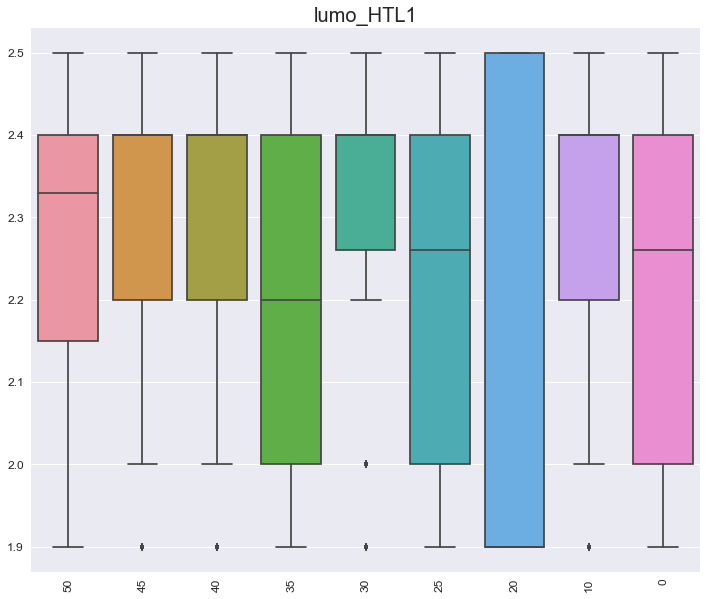

In [74]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.00000,5648.000000
mean,5.625000,5.648961,5.750793,5.436162,5.852701,5.578784,5.158320,5.71250,5.617688
std,0.323245,0.328182,0.260797,0.303141,0.242313,0.303536,0.096887,0.31284,0.318672
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.10000,5.100000
25%,5.425000,5.500000,5.700000,5.200000,5.700000,5.200000,5.100000,5.50000,5.200000
50%,5.700000,5.700000,5.700000,5.500000,5.900000,5.700000,5.100000,5.80000,5.700000
75%,5.825000,5.900000,5.900000,5.700000,6.100000,5.800000,5.200000,5.90000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,5.800000,6.10000,6.100000


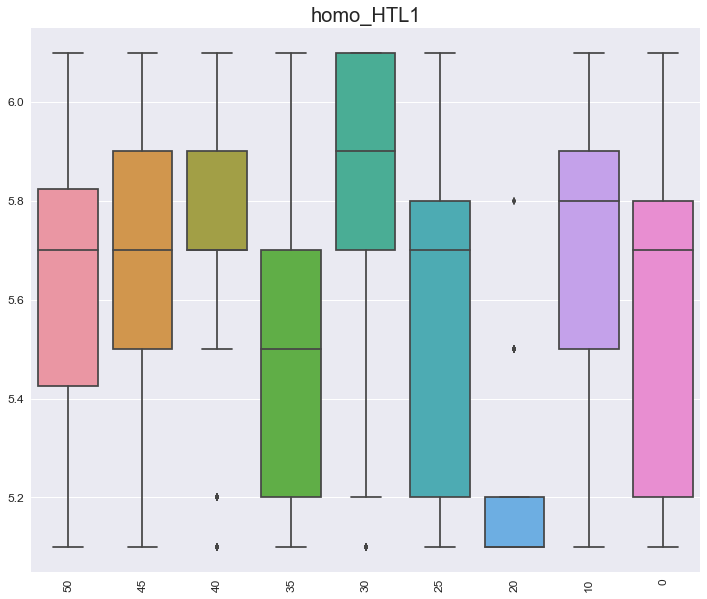

In [75]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.762500,2.764392,2.820936,2.676197,2.845057,2.748091,2.535325,2.801356,2.759253
std,0.223076,0.214958,0.187196,0.237112,0.151177,0.228305,0.190598,0.211283,0.220732
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.647500,2.670000,2.800000,2.580000,2.800000,2.580000,2.300000,2.670000,2.580000
50%,2.835000,2.800000,2.870000,2.670000,2.870000,2.870000,2.670000,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.870000,2.940000,2.940000,2.670000,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.870000,3.000000,3.000000


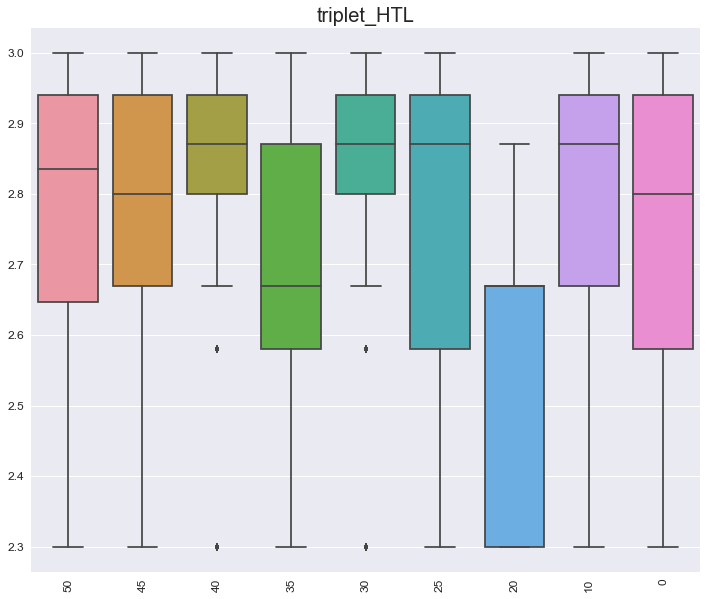

In [76]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,3.470000e+00,3.427329,2.705126,3.016859,2.640708,2.769360,2.894231,3.158263,3.095131
std,4.497466e-16,0.191438,0.269510,0.346842,0.213150,0.269638,0.168180,0.304209,0.293087
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000,2.800000
25%,3.470000e+00,3.470000,2.500000,2.730000,2.500000,2.600000,2.880000,2.800000,2.800000
50%,3.470000e+00,3.470000,2.700000,2.880000,2.600000,2.730000,2.880000,3.000000,3.000000
75%,3.470000e+00,3.470000,2.750000,3.470000,2.730000,2.880000,2.910000,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000,3.500000


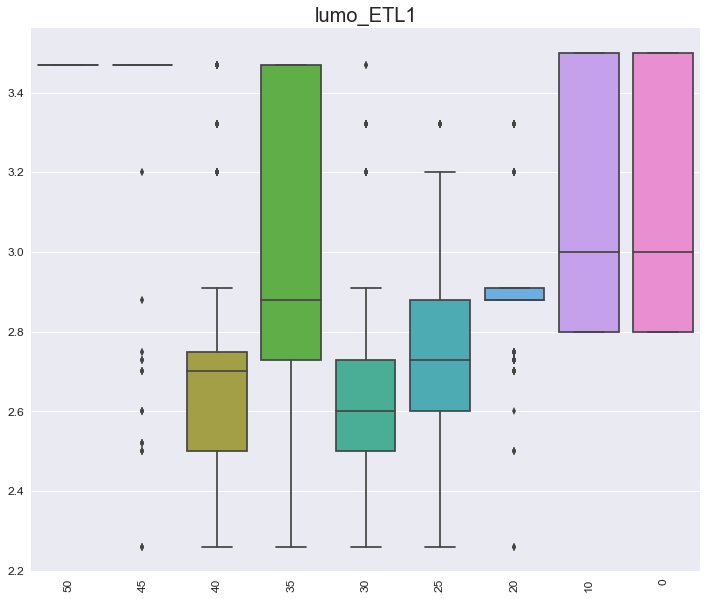

In [77]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,40.0,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,7.5,7.449748,6.492867,6.689572,6.584006,6.416979,6.280301,6.600847,6.527691
std,0.0,0.233763,0.357431,0.572804,0.310782,0.342288,0.278291,0.352364,0.338328
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000,6.200000
25%,7.5,7.500000,6.130000,6.130000,6.500000,6.120000,6.020000,6.200000,6.200000
50%,7.5,7.500000,6.500000,6.560000,6.790000,6.500000,6.130000,6.400000,6.400000
75%,7.5,7.500000,6.800000,7.500000,6.800000,6.680000,6.560000,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000


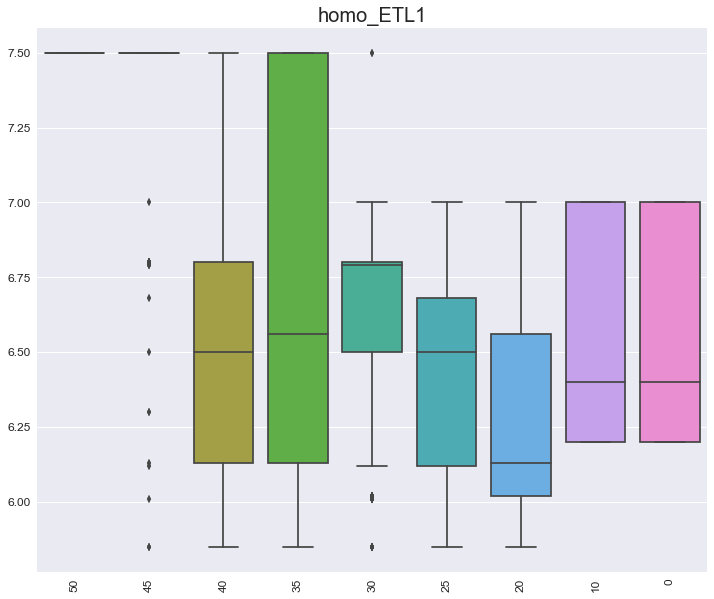

In [78]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.990000e+00,2.986721,2.863814,2.839201,2.940163,2.809786,2.747765,2.569915,2.566395
std,1.798987e-15,0.067995,0.247698,0.152221,0.300798,0.188570,0.070300,0.045911,0.047240
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000
25%,2.990000e+00,2.990000,2.700000,2.700000,2.700000,2.700000,2.700000,2.500000,2.500000
50%,2.990000e+00,2.990000,2.750000,2.750000,2.760000,2.750000,2.750000,2.600000,2.600000
75%,2.990000e+00,2.990000,2.800000,2.990000,3.360000,2.800000,2.750000,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.950000,2.600000,2.600000


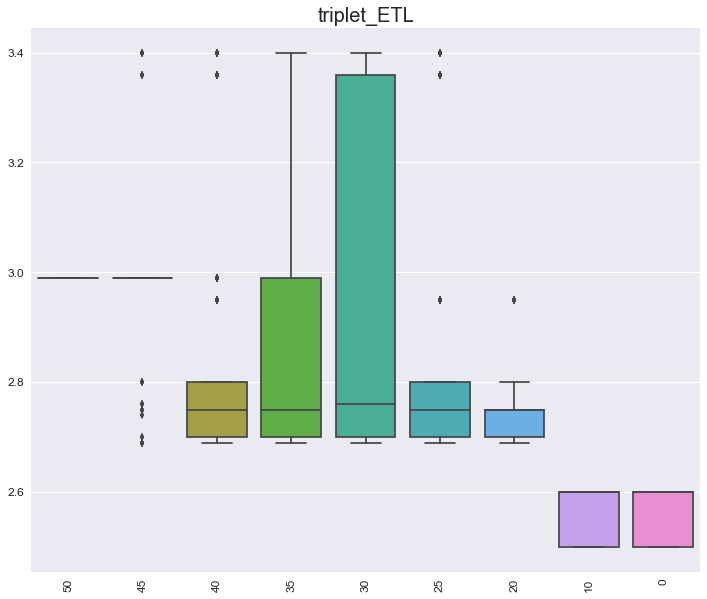

In [79]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,2.400000e+00,2.418991,2.403079,2.442037,2.405851,2.420417,2.471791,2.435148,2.417459
std,1.349240e-15,0.252032,0.242543,0.261561,0.235831,0.255106,0.236500,0.159382,0.256890
min,2.400000e+00,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.400000e+00,2.280000,2.280000,2.280000,2.280000,2.280000,2.300000,2.400000,2.270000
50%,2.400000e+00,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.300000
75%,2.400000e+00,2.460000,2.460000,2.550000,2.460000,2.550000,2.670000,2.400000,2.460000
max,2.400000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


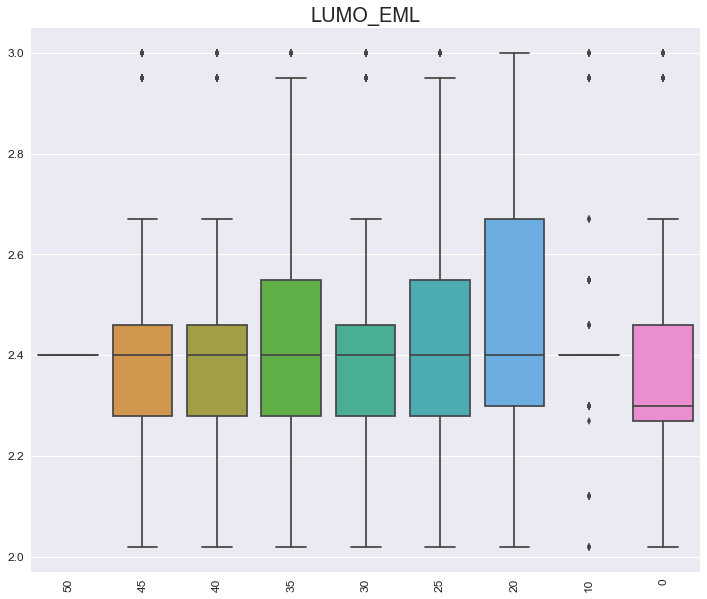

In [80]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,40.0,674.000000,6869.000000,4654.000000,4406.000000,15366.000000,631.000000,472.000000,5648.000000
mean,7.5,5.893472,5.962983,5.814334,6.212240,5.822501,5.854326,7.095636,5.808368
std,0.0,0.391286,0.511244,0.122426,0.755413,0.182147,0.099156,0.704600,0.139474
min,7.5,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,7.5,5.710000,5.710000,5.710000,5.700000,5.710000,5.800000,7.140000,5.700000
50%,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,5.900000,7.500000,5.800000
75%,7.5,5.900000,5.900000,5.900000,7.500000,5.900000,5.920000,7.500000,5.900000
max,7.5,7.500000,7.500000,6.060000,7.500000,7.500000,6.060000,7.500000,7.500000


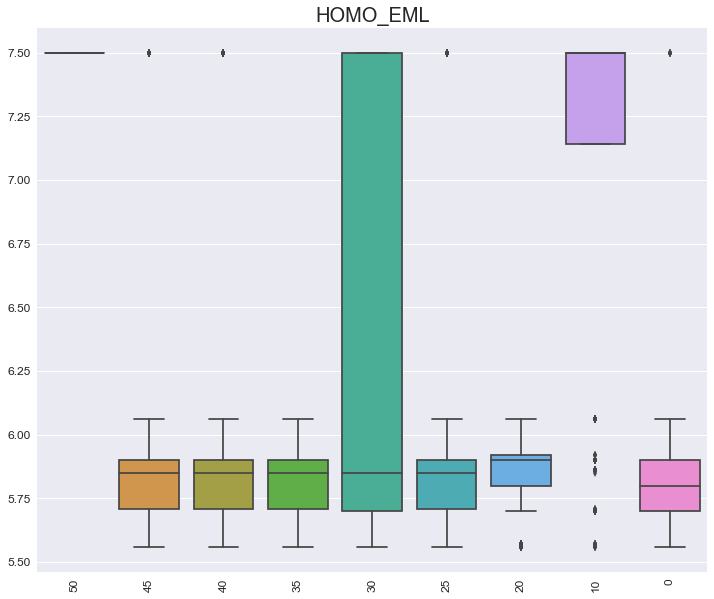

In [81]:
layer('HOMO_EML')